<a href="https://colab.research.google.com/github/GoGiants1/Seoul_Jeonse_Price/blob/main/Seoul_Jeonse_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 수집

아래의 코드 실행 이후 상단의 `런타임>런타임 재시작` 누르기

In [1]:
!python --version

Python 3.7.13


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 재시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
!pip install haversine statsmodels



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import collections
import matplotlib as plt
import requests
import json
from haversine import haversine
import pandas as pd
from pandas.io.json import json_normalize
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import numpy as np
import time
from datetime import datetime


# 서울대입구 줌 레벨 4까지 크롤링
res_0 = requests.get("https://apis.zigbang.com/v2/items?deposit_gteq=0&domain=zigbang&geohash=wydm0&needHasNoFiltered=true&rent_gteq=0&sales_type_in=%EC%A0%84%EC%84%B8&service_type_eq=%EC%9B%90%EB%A3%B8")
res_1 = requests.get("https://apis.zigbang.com/v2/items?deposit_gteq=0&domain=zigbang&geohash=wydm1&needHasNoFiltered=true&rent_gteq=0&sales_type_in=%EC%A0%84%EC%84%B8&service_type_eq=%EC%9B%90%EB%A3%B8")
res_2 = requests.get("https://apis.zigbang.com/v2/items?deposit_gteq=0&domain=zigbang&geohash=wydm2&needHasNoFiltered=true&rent_gteq=0&sales_type_in=%EC%A0%84%EC%84%B8&service_type_eq=%EC%9B%90%EB%A3%B8")
res_3 = requests.get("https://apis.zigbang.com/v2/items?deposit_gteq=0&domain=zigbang&geohash=wydm3&needHasNoFiltered=true&rent_gteq=0&sales_type_in=%EC%A0%84%EC%84%B8&service_type_eq=%EC%9B%90%EB%A3%B8")

res_arr = [res_0, res_1, res_2, res_3]
# res_arr = [res_0]
# 서울대 입구역 위도 경도
snu_lat = 37.4810562133789
snu_lng = 126.952354431152
snu_loc = (snu_lat, snu_lng)

# 봉천역
bong_lat = 37.482476
bong_lng = 126.941574
bong_loc = (bong_lat, bong_lng)

# 신림역
sin_lat = 37.4844551086426
sin_lng = 126.929397583008
sin_loc = (sin_lat, sin_lng)

# 낙성대역
nak_lat = 37.477117
nak_lng = 126.963418
nak_loc = (nak_lat, nak_lng)

#신대방
sindaebang_lat = 37.4875526428223
sindaebang_lng = 126.912956237793
sindaebang_loc = (sindaebang_lat, sindaebang_lng)

jeonse = pd.DataFrame()
not_jeonse = pd.DataFrame()
list_all = pd.DataFrame()


데이터 수집
필요시 """ """ 제거

In [5]:
"""
for r in res_arr:
  rooms = json.loads(r.text)
  list_all = list_all.append(pd.DataFrame(pd.json_normalize(rooms).loc[0, 'items']))
  
for i in list_all['item_id'].values.tolist():
  item_id = str(i)
  # description_url = f"https://apis.zigbang.com/v1/items/{item_id}/read?domain=zigbang&uuid=665ccbb0-b563-11ec-ba63-d720644dbbf5"
  # res_room_desc = requests.get(description_url)
  # room_description = json.loads(res_room_desc.text)
  room_info_url = f"https://apis.zigbang.com/v2/items/{item_id}"
  res_room_info = requests.get(room_info_url)
  room_info = res_room_info.json()
  room_info = room_info['item']
  room_info.pop('images', None)
  room_info.pop('image_thumbnail', None)
  if room_info['popular']:
    room_info['popular'] = 1
  jeonse = jeonse.append(pd.DataFrame.from_dict([room_info]))
  # print(jeonse)
  
df = pd.merge(jeonse, list_all, on='item_id', how='left')


df['description'] = df['description'].astype('str')
df['link'] = df['item_id'].astype('int').astype('str').apply(lambda d: 'https://zigbang.com/home/oneroom/items/' + d)

snu = []
bong = []
nak = []
sillim = []
sindaebang = []
for a, b in zip(df['lat'], df['lng']):
  snu.append(haversine(snu_loc, (a,b), unit = 'km'))
  bong.append(haversine(bong_loc, (a,b), unit = 'km'))
  nak.append(haversine(nak_loc, (a,b), unit = 'km'))
  sillim.append(haversine(sin_loc, (a,b), unit = 'km'))
  sindaebang.append(haversine(sindaebang_loc,(a,b), unit = 'km' ))


df['from_snu'] = pd.Series(snu)
df['from_bong'] = pd.Series(bong)
df['from_nak'] = pd.Series(nak)
df['from_sinlim'] = pd.Series(sillim)
df['from_sindaebang'] = pd.Series(sindaebang_loc)

now = datetime.now()
now_str = f"{now.year}_{now.month}_{now.day}_{now.hour}_{now.minute}"
idxes = df.description.str.contains('대출가능' or '전세대출'or '카뱅' or '중기청' or '카카오' or '가능', na=False)
jeonse = df[idxes]
not_jeonse = df[~idxes]

# ％％ 저장하기
df.to_excel('/content/drive/MyDrive/zigbang/all_' + now_str + '.xlsx', sheet_name='Sheet1', header=True, index=False)
jeonse.to_excel('/content/drive/MyDrive/zigbang/jeonse_' + now_str + '.xlsx', sheet_name='Sheet1', header=True, index=False)
not_jeonse.to_excel('/content/drive/MyDrive/zigbang/not_jeonse_' + now_str + '.xlsx', sheet_name='Sheet1', header=True, index=False)
"""

'\nfor r in res_arr:\n  rooms = json.loads(r.text)\n  list_all = list_all.append(pd.DataFrame(pd.json_normalize(rooms).loc[0, \'items\']))\n  \nfor i in list_all[\'item_id\'].values.tolist():\n  item_id = str(i)\n  # description_url = f"https://apis.zigbang.com/v1/items/{item_id}/read?domain=zigbang&uuid=665ccbb0-b563-11ec-ba63-d720644dbbf5"\n  # res_room_desc = requests.get(description_url)\n  # room_description = json.loads(res_room_desc.text)\n  room_info_url = f"https://apis.zigbang.com/v2/items/{item_id}"\n  res_room_info = requests.get(room_info_url)\n  room_info = res_room_info.json()\n  room_info = room_info[\'item\']\n  room_info.pop(\'images\', None)\n  room_info.pop(\'image_thumbnail\', None)\n  if room_info[\'popular\']:\n    room_info[\'popular\'] = 1\n  jeonse = jeonse.append(pd.DataFrame.from_dict([room_info]))\n  # print(jeonse)\n  \ndf = pd.merge(jeonse, list_all, on=\'item_id\', how=\'left\')\n\n\ndf[\'description\'] = df[\'description\'].astype(\'str\')\ndf[\'link\']

# Data 전처리

In [6]:
def save_xlxs(filename, df_to_save):
  now = datetime.now()
  now_str = f"{now.year}_{now.month}_{now.day}_{now.hour}_{now.minute}"
  df_to_save.to_excel(f'/content/drive/MyDrive/zigbang/{filename}' + now_str + '.xlsx', sheet_name='Sheet1', header=True, index=False)


In [7]:
!ls
!ls /content/drive/MyDrive/zigbang

drive  sample_data
 add_year_approved2022_5_31_14_2.xlsx
 add_year_approved2022_5_31_14_5.xlsx
 after_cleansing_2.xlsx
 after_cleansing_3.xlsx
 after_time_cleansing2022_5_31_7_13.xlsx
 all_2022_5_26_12_33.xlsx
 all_2022_5_26_12_45.xlsx
 all_2022_5_26_12_55.xlsx
'all_2022_5_26 .xlsx'
 all_2022_5_26.xlsx
 all2022_5_26.xlsx
 all_2022_5_27_11_2.xlsx
 all_2022_5_27_2_17.xlsx
 all_2022_5_29_9_9.xlsx
 all_2022_5_30_10_17.xlsx
 all｛｝｛｝｛｝.xlsx
 final_cleansing_2.xlsx
 final_cleansing.xlsx
 final_result2022_6_6_11_30.xlsx
 final_result2022_6_6_11_57.xlsx
 final_result2022_6_6_11_6.xlsx
 final_result2022_6_6_12_54.xlsx
 final_result2022_6_6_12_8.xlsx
 final_result2022_6_6_14_5.xlsx
 jeonse2022_5_26_12_33.xlsx
 jeonse2022_5_26_12_45.xlsx
 jeonse_2022_5_26_12_55.xlsx
 jeonse2022_5_26.xlsx
 jeonse_2022_5_27_10_51.xlsx
 jeonse_2022_5_27_11_2.xlsx
 jeonse_2022_5_27_2_17.xlsx
 jeonse_2022_5_29_9_9.xlsx
 jeonse_2022_5_30_10_17.xlsx
 mid_clean2022_5_31_6_54.xlsx
 mid_clean2022_5_31_6_59.xlsx
 mid_clean20

In [8]:
# df = pd.read_excel("/content/drive/MyDrive/zigbang/after_cleansing_3.xlsx", "Sheet1", index_col=None,na_values=[None, 'NaN'])

In [9]:
# str(df.approve_date[2])
# df.fillna(0,inplace=True)

# sindaebang = []
# for a, b in zip(a['lat'], a['lng']):
#   sindaebang.append(haversine(sindaebang_loc,(a,b), unit = 'km' ))
# df['from_sindaebang'] = sindaebang



In [10]:
# df
# now = datetime.now()
# now_str = f"{now.year}_{now.month}_{now.day}_{now.hour}_{now.minute}"
# df.to_excel('/content/drive/MyDrive/zigbang/mid_clean' + now_str + '.xlsx', sheet_name='Sheet1', header=True, index=False)

In [11]:
# df.approve_date = df.approve_date.apply(lambda x: f"{str(x)[0:4]}-{str(x)[4:6]}-{str(x)[6:]}" if type(x) == int else x)
# print(type(df.approve_date[2]))

In [12]:
# df.approve_date
# now = datetime.now()
# now_str = f"{now.year}_{now.month}_{now.day}_{now.hour}_{now.minute}"
# df.to_excel('/content/drive/MyDrive/zigbang/mid_clean' + now_str + '.xlsx', sheet_name='Sheet1', header=True, index=False)

In [13]:
# df.approve_date.replace('2021-10-331', '2021-10-31', inplace=True)

# df.approve_date = pd.to_datetime(df.approve_date, infer_datetime_format=True)  


In [14]:
# df.approve_date
# save_xlxs('after_time_cleansing',df)

In [15]:
df_int_approve = pd.read_excel("/content/drive/MyDrive/zigbang/add_year_approved2022_5_31_14_5.xlsx", "Sheet1", index_col=None,na_values=[None, 'NaN'])
df_str_approve = pd.read_excel("/content/drive/MyDrive/zigbang/mid_cleansing_string_approve_date.xlsx", "Sheet1", index_col=None,na_values=[None, 'NaN'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


In [16]:
# 사용하지 않을 데이터 삭제

In [17]:
# df_int_approve['year_approved'] = df_int_approve['approve_date'].dt.year
# save_xlxs('add_year_approved',df_int_approve)

- 데이터 확인
- 이상치 탐색 및 제거
- 결측 데이터 확인
- Skewness(비대칭도) 확인


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import missingno as msno
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn')
# sns.set(font_scale=1.5)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

df_int_approve.head()

df_int_approve.elevator = df_int_approve.elevator.apply(lambda x: 1 if x else 0)
df_int_approve.floor_all = df_int_approve.floor_all.apply(lambda x: x[0:-1] if type(x) == str and '층' in x.strip() else x ).astype('int')
df_int_approve['age'] = df_int_approve.year_approved.apply(lambda x: 2022 - x)


df_int_approve.residence_type = df_int_approve.residence_type.apply(lambda x: x.replace(" ",""))

In [19]:


numerical_feats = df_int_approve.dtypes[df_int_approve.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_int_approve.dtypes[df_int_approve.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

# 편의상 수치형 변수와 명목형 변수를 나눠줍니다.

Number of Numerical features:  29
Number of Categorical features:  17


In [20]:
print(df_int_approve[numerical_feats].columns)
print("*"*80)
print(df_int_approve[categorical_feats].columns)
# 변수명을 확인 

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = collections.Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        
    return multiple_outliers
# 튜키의 방법에 따라 이상치 제거

Index(['item_id', 'user_no', '보증금액', '전용면적_m2', '공급면적_m2', '대지권면적_m2',
       'room_type_code', 'room_type', 'elevator', 'floor', 'floor_string',
       'floor_all', 'manage_cost', 'is_premium', 'room_gubun_code',
       'approve_date', 'bathroom_count', 'popular', 'lat', 'lng', 'from_snu',
       'from_bong', 'from_nak', 'from_sin', 'from_sindaebang',
       'min_subway_distance', '대출가능', 'year_approved', 'age'],
      dtype='object')
********************************************************************************
Index(['sales_type', 'sales_title', 'service_type', 'address', 'jibunAddress',
       'local1', 'local2', 'local3', 'title', 'description', 'random_location',
       'parking', 'room_direction', 'movein_date', 'updated_at',
       'residence_type', 'link'],
      dtype='object')


- 이상치(outlier) 제거

In [21]:

Outliers_to_drop = detect_outliers(df_int_approve, 2, ['보증금액', '전용면적_m2', '공급면적_m2', 'manage_cost', 'min_subway_distance'])
# 이상치 개수, 값 확인 
print(len(Outliers_to_drop))
df_int_approve.loc[Outliers_to_drop]
# 투룸, 쓰리룸 같은 큰 방이 이상치로 판단되어 많이 제거
# 이상치 제거

df_int_approve = df_int_approve.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
df_int_approve.shape

32


(1191, 46)

In [22]:
# 결측값 확인 -> 없음
for col in df_int_approve.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_int_approve[col].isnull().sum() / df_int_approve[col].shape[0]))
    print(msperc)


column:    item_id	 Percent of NaN value: 0.00%
column:    user_no	 Percent of NaN value: 0.00%
column: sales_type	 Percent of NaN value: 0.00%
column: sales_title	 Percent of NaN value: 0.00%
column: service_type	 Percent of NaN value: 0.00%
column:       보증금액	 Percent of NaN value: 0.00%
column:    전용면적_m2	 Percent of NaN value: 0.00%
column:    공급면적_m2	 Percent of NaN value: 0.00%
column:   대지권면적_m2	 Percent of NaN value: 0.00%
column:    address	 Percent of NaN value: 0.00%
column: jibunAddress	 Percent of NaN value: 0.00%
column:     local1	 Percent of NaN value: 0.00%
column:     local2	 Percent of NaN value: 0.00%
column:     local3	 Percent of NaN value: 0.00%
column: room_type_code	 Percent of NaN value: 0.00%
column:  room_type	 Percent of NaN value: 0.00%
column:      title	 Percent of NaN value: 0.00%
column: description	 Percent of NaN value: 0.00%
column: random_location	 Percent of NaN value: 0.00%
column:    parking	 Percent of NaN value: 0.00%
column:   elevator	 Perce

- Skewness 확인

In [23]:
for col in numerical_feats:
    if col == 'approve_date':
      continue
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df_int_approve[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df_int_approve[col].kurt())  
         )
    

item_id         Skewness: -3.54     Kurtosis: 027.34
user_no         Skewness: 00.16     Kurtosis: -01.55
보증금액            Skewness: 00.79     Kurtosis: 000.19
전용면적_m2         Skewness: 01.99     Kurtosis: 006.44
공급면적_m2         Skewness: 03.45     Kurtosis: 022.99
대지권면적_m2        Skewness: 25.14     Kurtosis: 740.21
room_type_code  Skewness: 00.53     Kurtosis: -01.15
room_type       Skewness: 00.55     Kurtosis: -01.06
elevator        Skewness: -0.35     Kurtosis: -01.88
floor           Skewness: 01.01     Kurtosis: 002.24
floor_string    Skewness: 01.21     Kurtosis: 003.02
floor_all       Skewness: 01.53     Kurtosis: 002.69
manage_cost     Skewness: 01.03     Kurtosis: 005.67
is_premium      Skewness: 00.02     Kurtosis: -02.00
room_gubun_code Skewness: 00.71     Kurtosis: -01.44
bathroom_count  Skewness: 05.11     Kurtosis: 024.19
popular         Skewness: 02.42     Kurtosis: 003.84
lat             Skewness: -0.47     Kurtosis: -00.35
lng             Skewness: 00.23     Kurtosis: 

# 데이터 탐색 및 분석(Exploratory Data Analysis)

In [24]:
# # 한글 폰트 적용 확인
# import matplotlib.font_manager as fm

# # 설치된 폰트 출력
# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

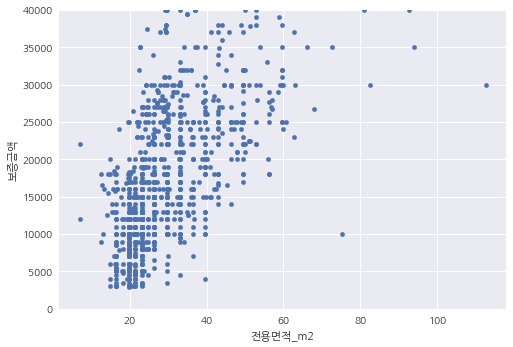

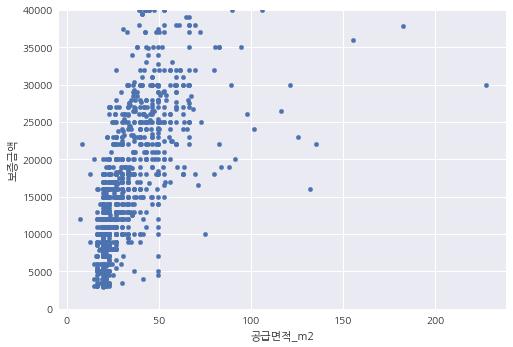

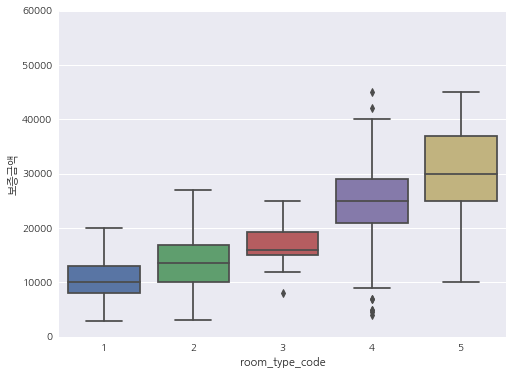

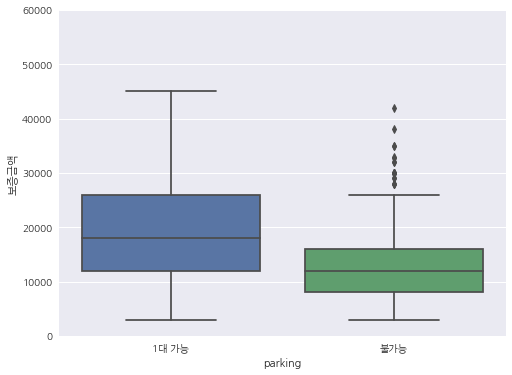

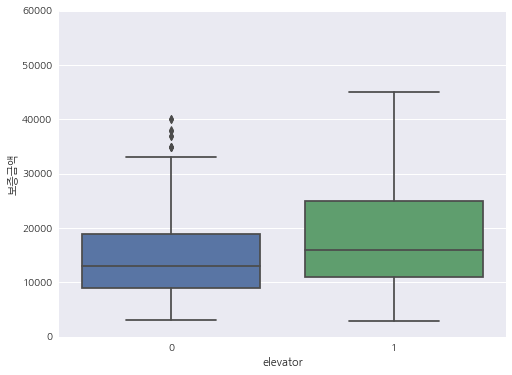

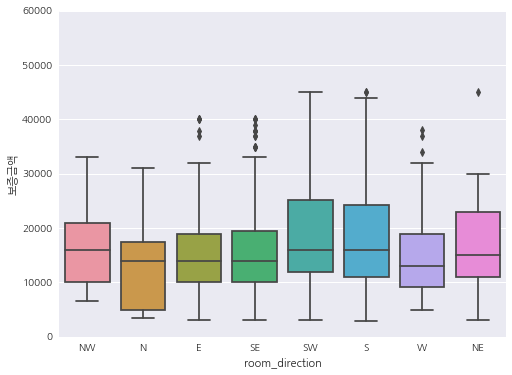

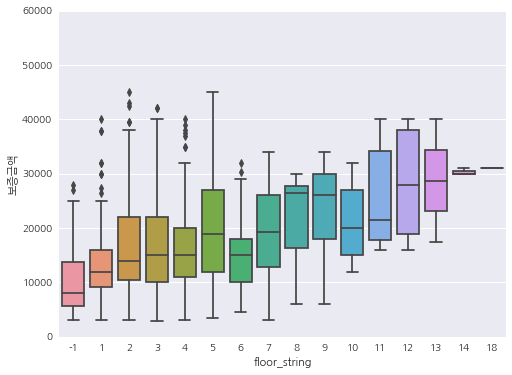

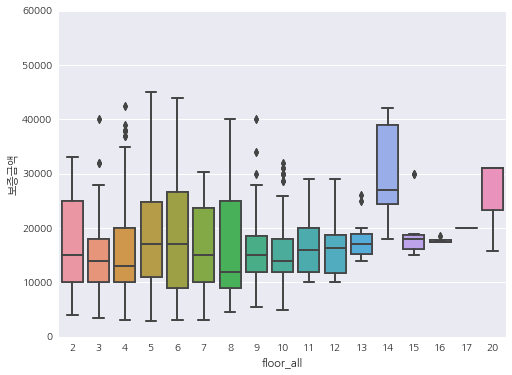

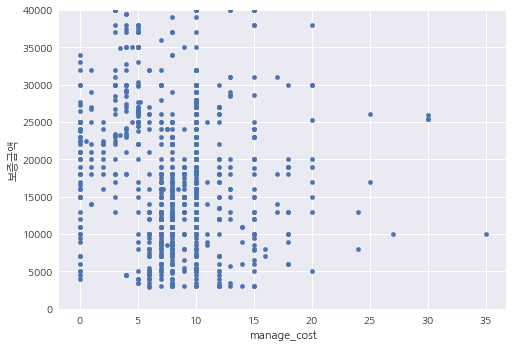

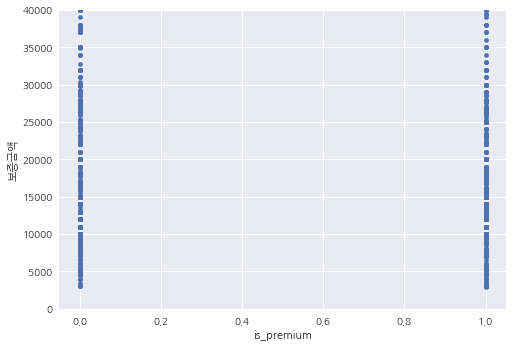

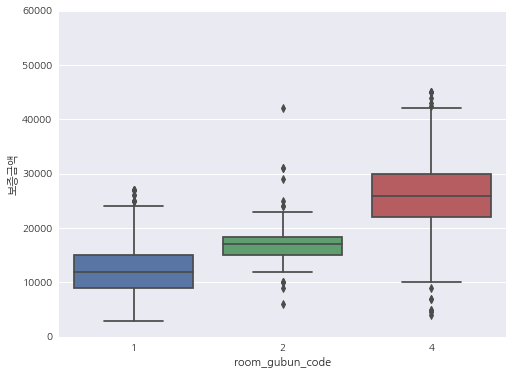

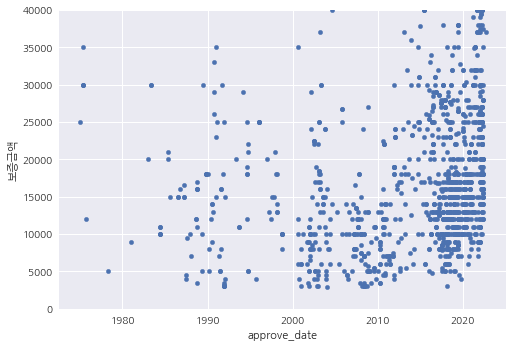

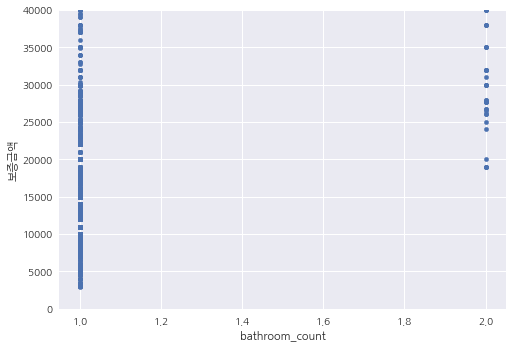

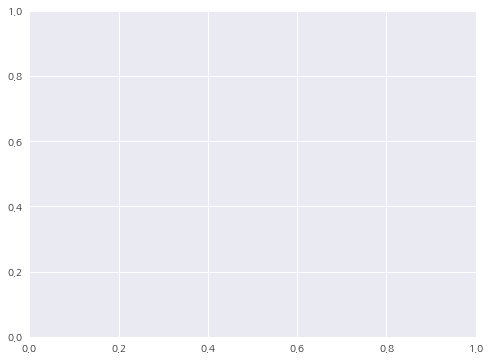

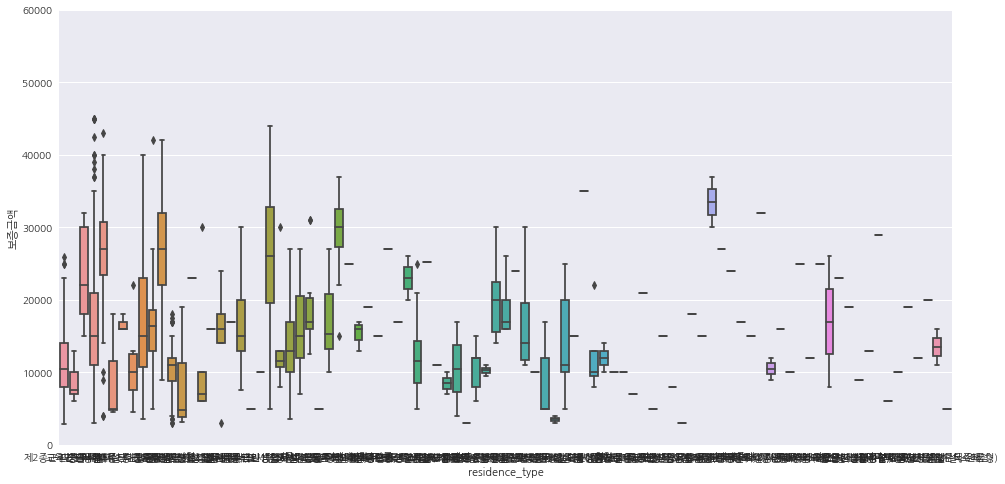

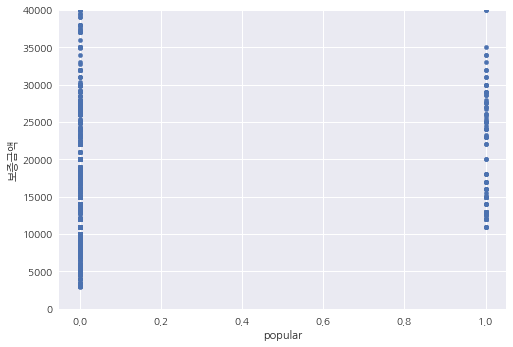

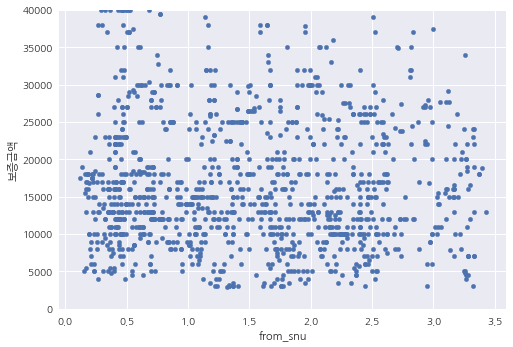

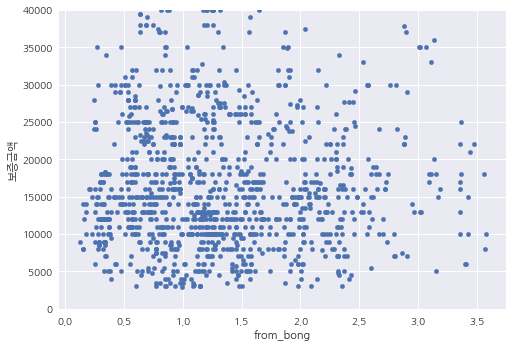

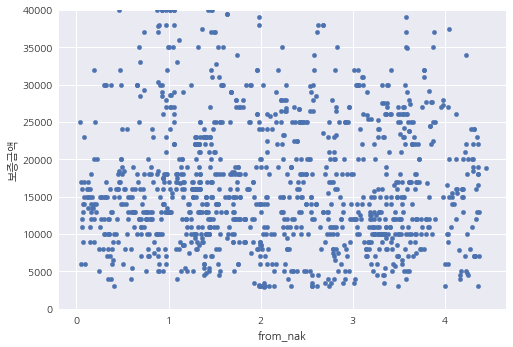

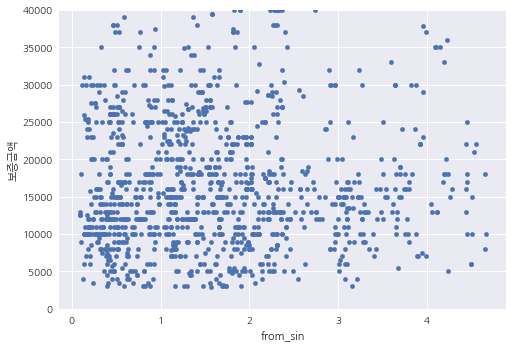

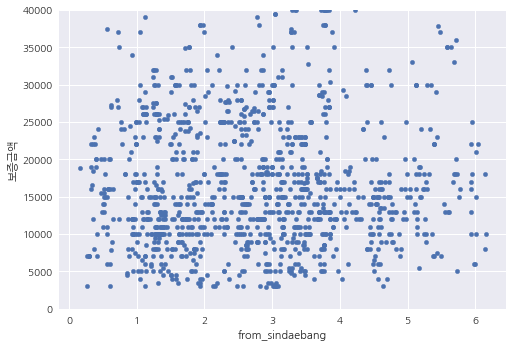

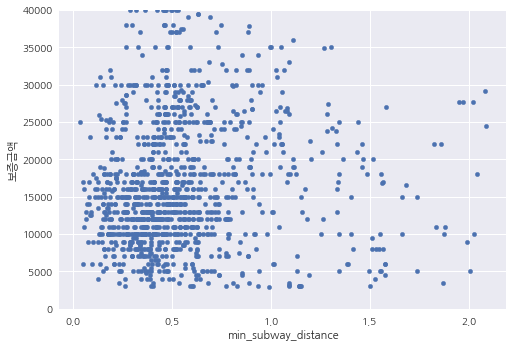

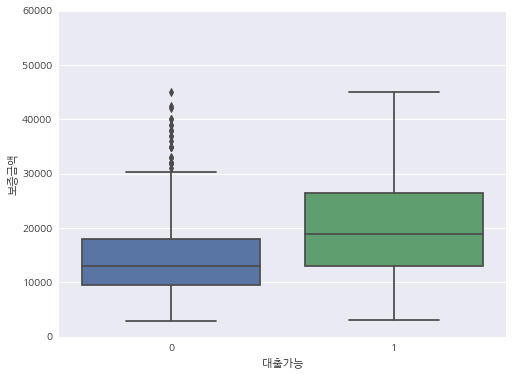

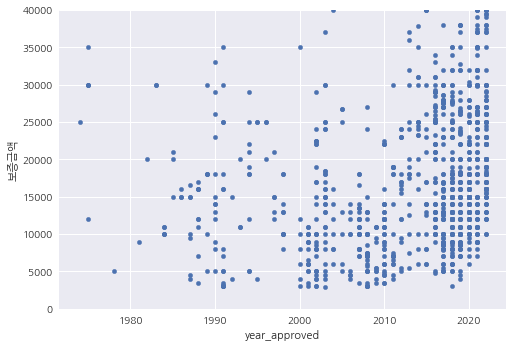

In [25]:
interesting_col = ['room_direction','room_type_code', 'elevator','floor_all', 'manage_cost', '전용면적_m2',	'공급면적_m2',	'parking'	,	'floor_string',	'manage_cost',	'is_premium',	'room_gubun_code'	,'approve_date',	'bathroom_count',	'residence_type',	'popular'	,'from_snu',	'from_bong',	'from_nak',	'from_sin',	'from_sindaebang'	,'min_subway_distance','year_approved', '대출가능']
categorical_col = ['room_direction','room_type_code', 'elevator','floor_all','floor_string','residence_type', '대출가능','parking','room_gubun_code','service_type']
for c in df_int_approve.columns:
  if c not in interesting_col:
    continue
  var = c
  data = pd.concat([df_int_approve['보증금액'], df_int_approve[var]], axis=1)
  if c in categorical_col:
    f, ax = plt.subplots(figsize=(8, 6))
    if c == 'residence_type':
      f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y="보증금액", data=data)
    if c == 'floor_all':
      fig = sns.boxplot(x=var, y="보증금액", data=data, order = sorted(set(df_int_approve.floor_all.values)))
    fig.axis(ymin=0, ymax=60000)
  else:
    data.plot.scatter(x=var, y='보증금액', ylim=(0,40000))


## Correlation Heatmap

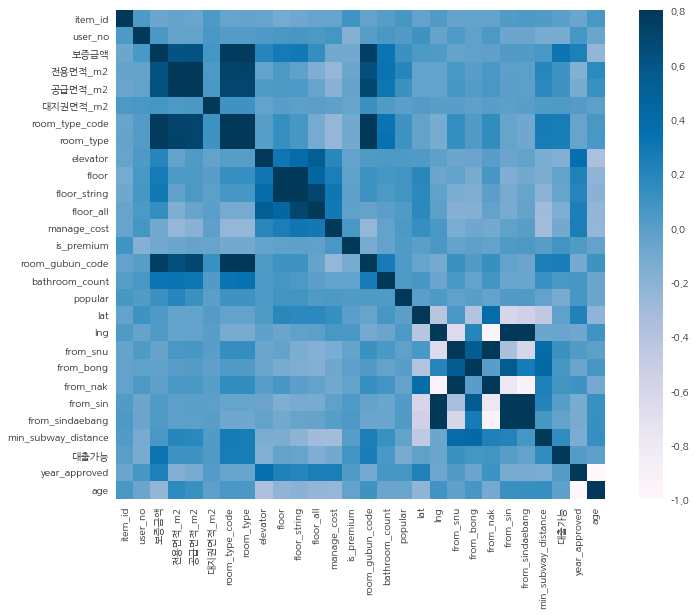

In [26]:
# Correlation

corrmat = df_int_approve.corr()
colormap = plt.cm.PuBu
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap= colormap, vmax=.8, square=True)

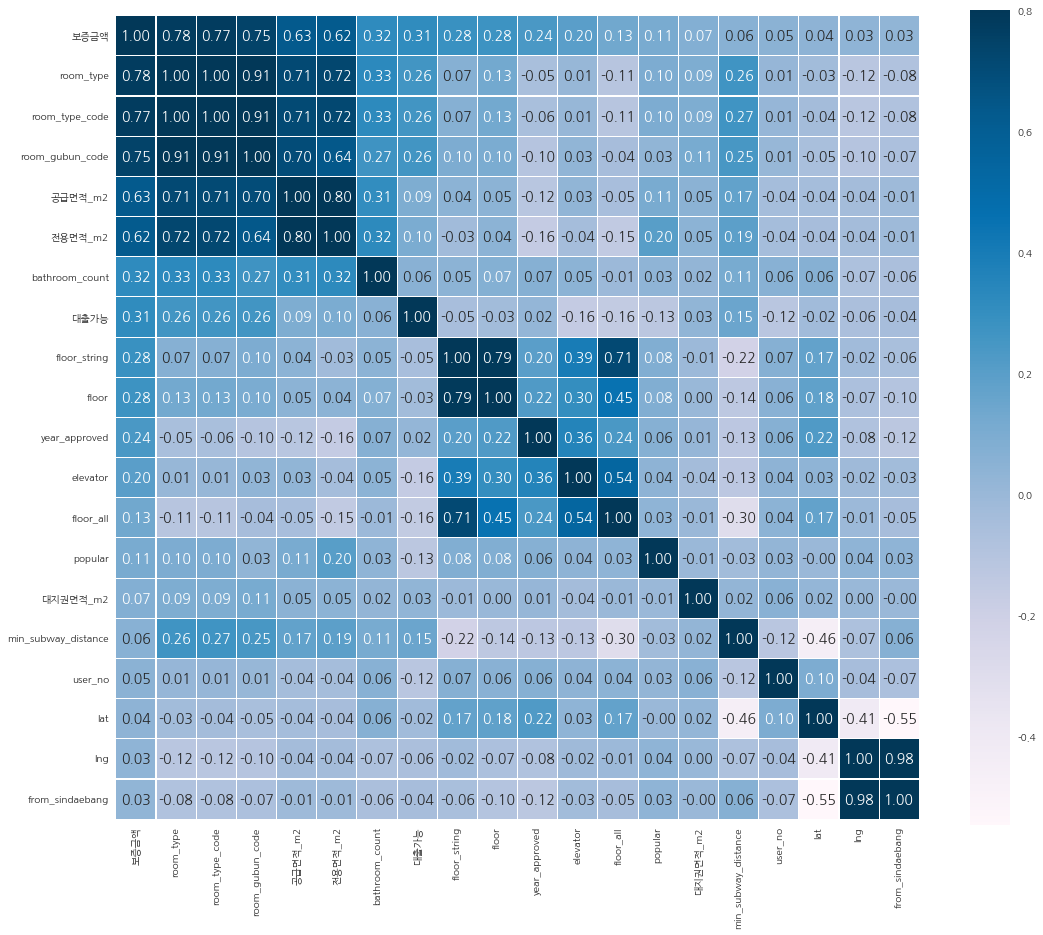

In [27]:
# 전세 보증금 correlation matrix
# zoomed heatmap
# 다중 공선성 문제 해결
def plot_corr_mat(df,col_name):
  k = 20 #number of variables for heatmap
  cols = corrmat.nlargest(k, col_name)[col_name].index
  f , ax = plt.subplots(figsize = (18,15))
  cm = np.corrcoef(df_int_approve[cols].values.T)
  hm = sns.heatmap(cm,vmax=.8, linewidths=0.1, square=True, annot=True, fmt='.2f', annot_kws={'size': 14},linecolor="white", yticklabels=cols.values, xticklabels=cols.values, cmap= colormap)
  plt.show()

plot_corr_mat(df_int_approve, '보증금액')

In [28]:
# VIF 확인
# from statsmodels.stats.outliers_influence import variance_inflation_factor 

# def check_vif(df):
#   vif = pd.DataFrame()
#   numerical_feats = df_int_approve.dtypes[df_int_approve.dtypes != "object"].index
#   df_numeric = df_int_approve[numerical_feats]
#   # vif["VIF Factor"] = [print(df.iloc[:,i]) for i in range(df.shape[1]) if df.iloc[:,i].dtypes != 'object']
#   vif["VIF_Factor"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]
#   vif["features"] = df_numeric.columns

#   return vif

# v = check_vif(df_int_approve)
# v

## Pair plot

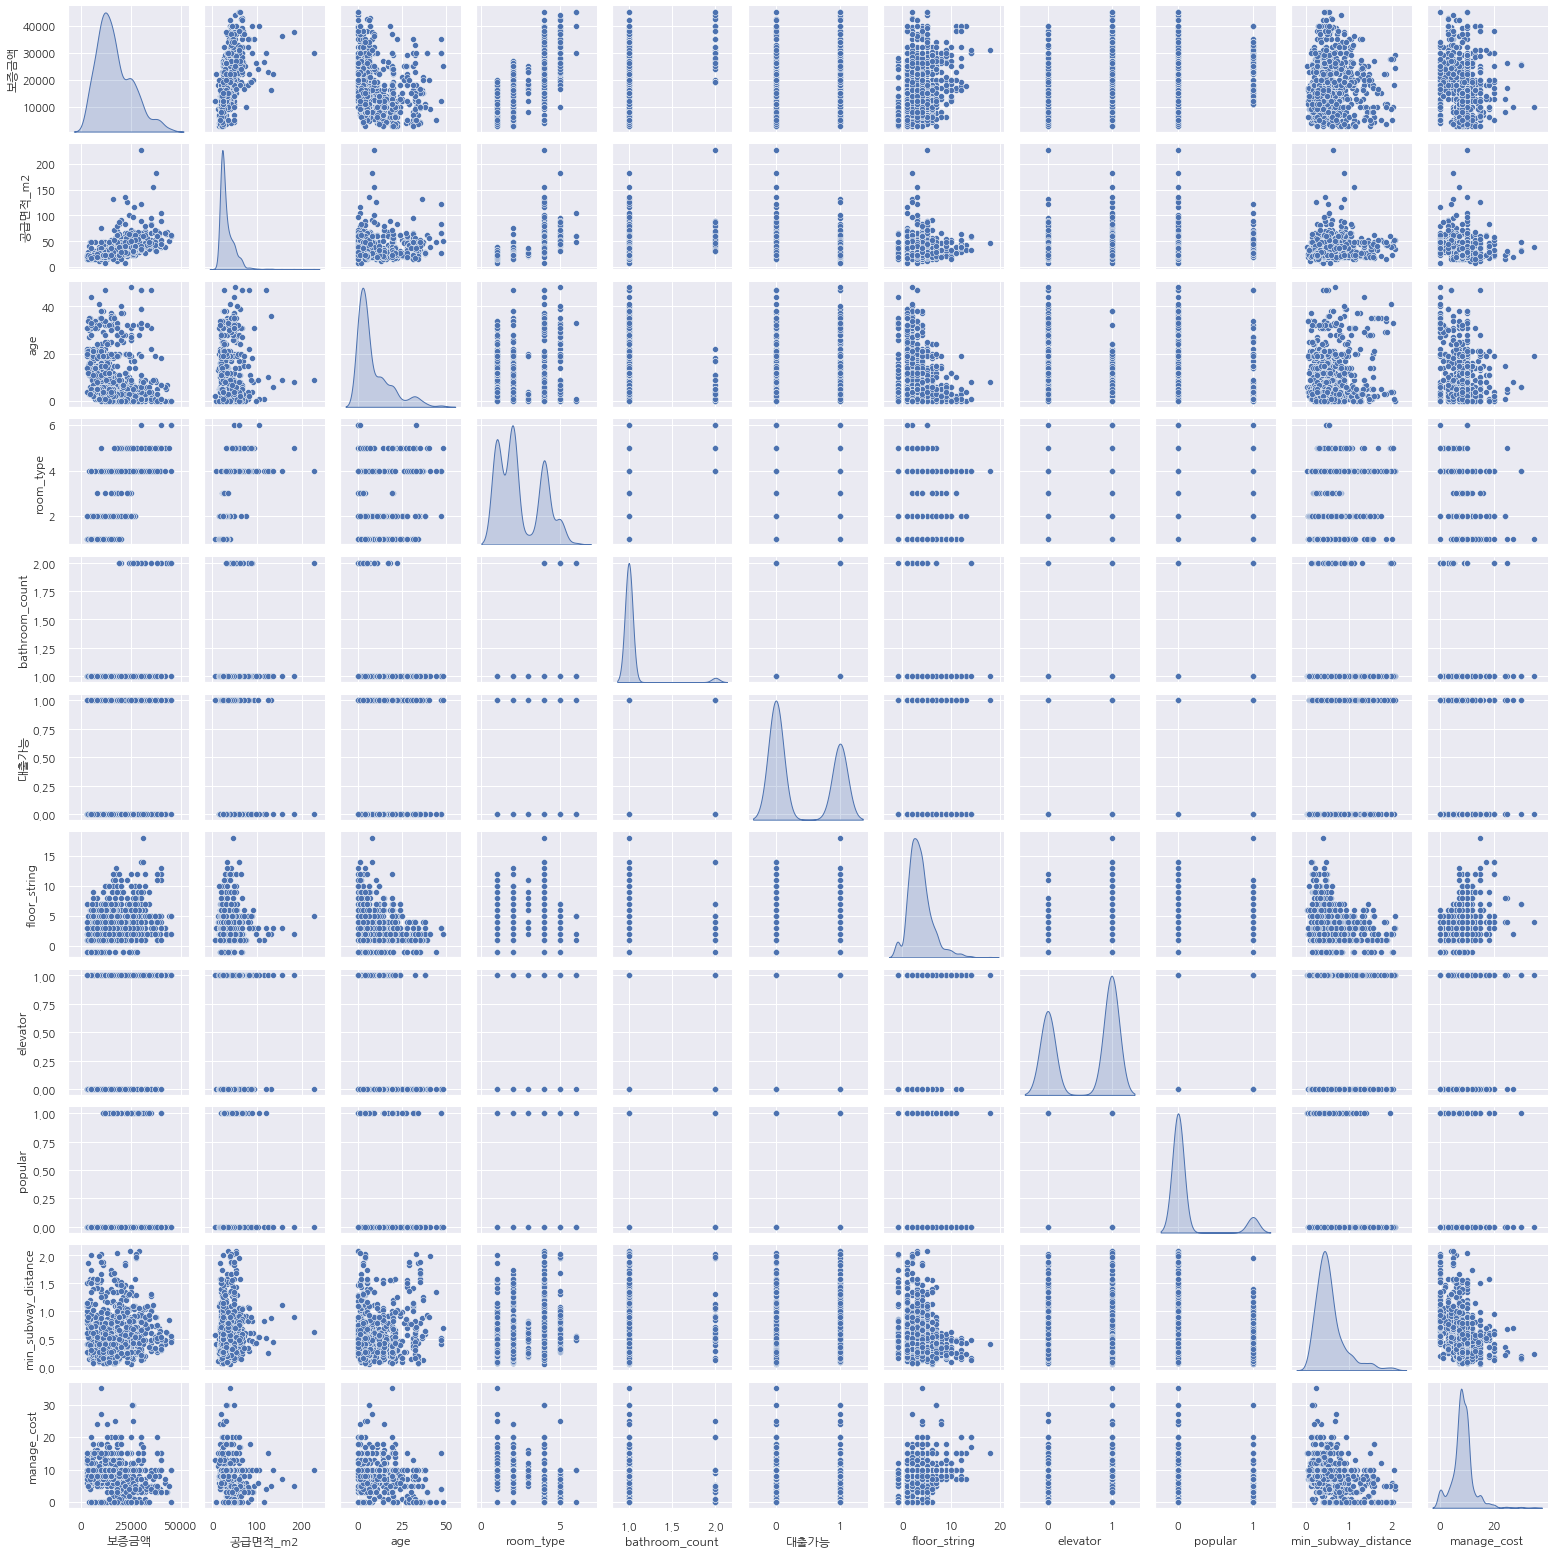

In [29]:
# Draw pair plot
sns.set()
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
columns = ['보증금액','공급면적_m2', 'age','room_type','bathroom_count','대출가능','floor_string','elevator','popular','min_subway_distance','manage_cost']
sns.pairplot(df_int_approve[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()


## Draw Scatter plot


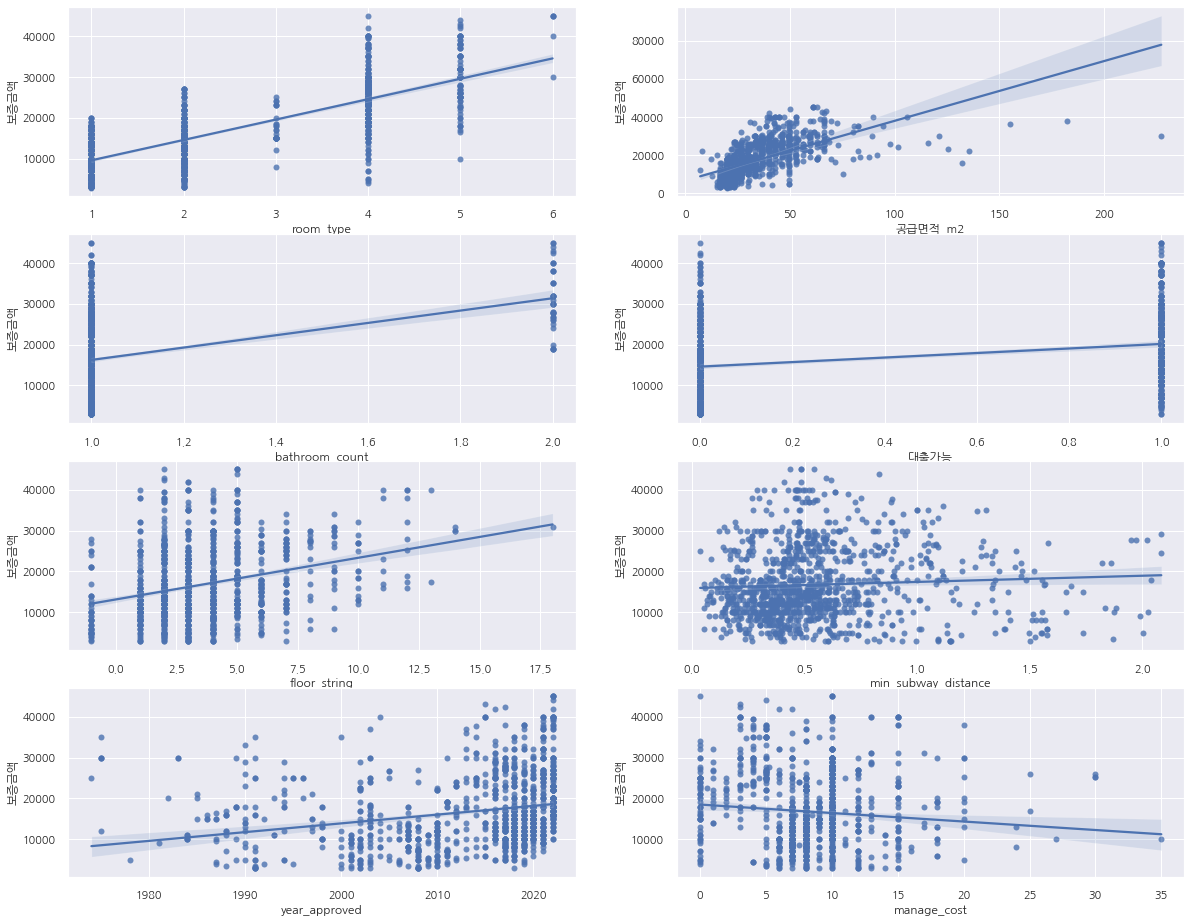

In [30]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20,16))
room_type_scatter_plot = pd.concat([df_int_approve['보증금액'],df_int_approve['room_type']],axis = 1)
sns.regplot(x='room_type',y = '보증금액',data = room_type_scatter_plot, scatter= True, fit_reg=True, ax=ax1)
공급면적_m2_scatter_plot = pd.concat([df_int_approve['보증금액'],df_int_approve['공급면적_m2']],axis = 1)
sns.regplot(x='공급면적_m2',y = '보증금액',data = 공급면적_m2_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
bathroom_count_scatter_plot = pd.concat([df_int_approve['보증금액'],df_int_approve['bathroom_count']],axis = 1)
sns.regplot(x='bathroom_count',y = '보증금액',data = bathroom_count_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
대출가능_scatter_plot = pd.concat([df_int_approve['보증금액'],df_int_approve['대출가능']],axis = 1)
sns.regplot(x='대출가능',y = '보증금액',data = 대출가능_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
floor_string_scatter_plot = pd.concat([df_int_approve['보증금액'],df_int_approve['floor_string']],axis = 1)
sns.regplot(x='floor_string',y = '보증금액',data = floor_string_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
min_subway_distance_scatter_plot = pd.concat([df_int_approve['보증금액'],df_int_approve['min_subway_distance']],axis = 1)
sns.regplot(x='min_subway_distance',y = '보증금액',data = min_subway_distance_scatter_plot,scatter= True, fit_reg=True, ax=ax6)
year_approved_scatter_plot = pd.concat([df_int_approve['보증금액'],df_int_approve['year_approved']],axis = 1)
sns.regplot(x='year_approved', y = '보증금액', data= year_approved_scatter_plot, scatter= True, fit_reg=True, ax= ax7)
manage_cost_scatter_plot = pd.concat([df_int_approve['보증금액'],df_int_approve['manage_cost']],axis = 1)
sns.regplot(x='manage_cost', y = '보증금액', data= manage_cost_scatter_plot, scatter= True, fit_reg=True, ax= ax8)

# Target Feature "보증금액"과 가장 밀접한 연관이 있다고 판단됐던 변수들의 Scatter Plot을 그림
# room_type, bathroom_count 같은 변수들은 실제로는 범주형 데이터의 특징을 보인다. (등급, 갯수 등을 의미하기 때문)

# categorical data 분석



In [31]:
# categorical_feats = ['room_direction','room_type','room_type_code',
#                      'elevator','floor_all','floor_string','residence_type',
#                      '대출가능','parking','room_gubun_code', 'is_premium'
#                      'sales_type', 'sales_title', 'address', 'jibunAddress',
#                      'local1', 'local2', 'local3', 'title', 'description', 'random_location',
#                      'parking', 'room_direction', 'movein_date', 'updated_at',
#                      'residence_type', 'link']
# categorical_feats = df_int_approve.dtypes[df_int_approve.dtypes == "object"].index
categorical_feats = ['대출가능','room_type','room_direction', 'parking', 'room_gubun_code', 'is_premium', 'popular', 'elevator']
print("Number of Categorical features: ", len(categorical_feats))
for catg in categorical_feats:
    print(df_int_approve[catg].value_counts())
    print('='*50)
    

Number of Categorical features:  8
0    727
1    464
Name: 대출가능, dtype: int64
2    414
1    365
4    294
5     86
3     27
6      5
Name: room_type, dtype: int64
S     356
SE    279
SW    228
W     114
E     113
NE     37
N      33
NW     31
Name: room_direction, dtype: int64
1대 가능    681
불가능      510
Name: parking, dtype: int64
1    753
4    381
2     57
Name: room_gubun_code, dtype: int64
0    602
1    589
Name: is_premium, dtype: int64
0    1054
1     137
Name: popular, dtype: int64
1    699
0    492
Name: elevator, dtype: int64


BoxPlot을 그려 Categorical Feature와 보증금액의 관계를 파악.

room_direction: 방의 주된 방향(채광과 관련)
room_type: 방의 설계 형태(1: 원룸, 2:1.5룸 ,3:복층, 4:투룸, 5: 쓰리룸 6: 쓰리룸 복층)
elevator: 승강기 유무(1: 있음, 0: 없음)
(floor_all: 건물의 전체 층수, 고층건물일수록 조금 증가하는 경향이 있는 것 같으나, 하나의 범위 내에서 편차가 크다.) -> 

floor_string: 방이 어떤 층에 존재하는지 알려줌. 양의 상관관계 존재하는 것으로 파악. 

대출가능: 대출이 가능한 집이 평균적인 보증금액이 더욱 크다.

room_gubun_code: 원룸(1), 오피스텔(2), 빌라(4)


Index(['item_id', 'user_no', 'sales_type', 'sales_title', 'service_type',
       '보증금액', '전용면적_m2', '공급면적_m2', '대지권면적_m2', 'address', 'jibunAddress',
       'local1', 'local2', 'local3', 'room_type_code', 'room_type', 'title',
       'description', 'random_location', 'parking', 'elevator',
       'room_direction', 'movein_date', 'floor', 'floor_string', 'floor_all',
       'manage_cost', 'is_premium', 'room_gubun_code', 'updated_at',
       'approve_date', 'bathroom_count', 'residence_type', 'popular', 'lat',
       'lng', 'link', 'from_snu', 'from_bong', 'from_nak', 'from_sin',
       'from_sindaebang', 'min_subway_distance', '대출가능', 'year_approved',
       'age'],
      dtype='object')


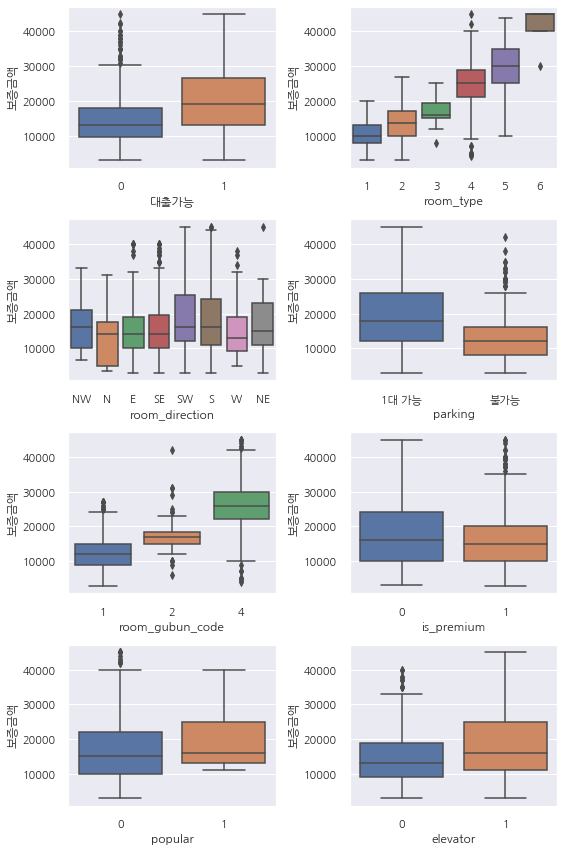

In [32]:
li_cat_feats = list(categorical_feats)
nr_rows = 4
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))
print(df_int_approve.columns)
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=df_int_approve["보증금액"], data=df_int_approve, ax = axs[r][c])

plt.tight_layout()
plt.show()

# Feature Engineering

In [33]:
column_to_delete = ['item_id', 'user_no', '대지권면적_m2', 'approve_date', 
                    'from_snu','from_bong', 'from_nak', 'from_sin', 'from_sindaebang',
                    'sales_type', 'sales_title', 'service_type', 'address', 'jibunAddress',
                    'local1', 'local2', 'local3', 'title', 'description', 'random_location',
                    'movein_date', 'updated_at', 'link','floor', 'room_type_code']

for c in column_to_delete:
  df_int_approve.drop(c, axis = 1, inplace=True)


- Skewness 제거를 위해 log 씌워주기 
- Box-Cox Transformation

In [34]:
from scipy.special import boxcox1p
tmp_df = pd.DataFrame()
def check_skew_kurt(df, col_name, is_drop):
  if col_name in categorical_feats or col_name in ['approve_date', ]:
    return
  lam = 0.15
  print(f"===={col_name}====")
  tmp_df[col_name] = df[col_name]
  tmp_df[f"{col_name}_log"] = df[col_name].map(lambda i: np.log(i) if i>0 else 0)
  tmp_df[f"{col_name}_log1p"] = df[col_name].map(lambda i: np.log1p(i) if i>0 else 0)
  tmp_df[f"{col_name}_boxcox1p"] = boxcox1p(df[col_name], lam)
  # df[f"{col_name}_log"] = np.log(df_int_approve[col_name])
  # df[f"{col_name}_log1p"] = np.log1p(df_int_approve[col_name])
  # 원래 값
  f, ax = plt.subplots(1, 1, figsize = (10,6))
  g = sns.distplot(tmp_df[col_name], color = "b", label="Skewness: {:2f}".format(tmp_df[col_name].skew()), ax=ax)
  g = g.legend(loc = "best")

  # 로그 씌운 값
  f2, ax2 = plt.subplots(1, 1, figsize = (10,6))
  gg = sns.distplot(tmp_df[f"{col_name}_log"], color = "b", label="Skewness: {:2f}".format(tmp_df[f"{col_name}_log"].skew()), ax=ax2)
  gg = gg.legend(loc = "best")

  
  # 로그 씌운 값
  f3, ax3 = plt.subplots(1, 1, figsize = (10,6))
  ggg = sns.distplot(tmp_df[f"{col_name}_log1p"], color = "b", label="Skewness: {:2f}".format(tmp_df[f"{col_name}_log1p"].skew()), ax=ax3)
  ggg = ggg.legend(loc = "best")

  # 박스콕스
  f4, ax4 = plt.subplots(1, 1, figsize = (10,6))
  gggg = sns.distplot(tmp_df[f"{col_name}_boxcox1p"], color = "b", label="Skewness: {:2f}".format(tmp_df[f"{col_name}_boxcox1p"].skew()), ax=ax4)
  gggg = gggg.legend(loc = "best")

  
  print(f"\n{col_name}\nSkewness: %f" % tmp_df[col_name].skew())
  print("Kurtosis: %f" % tmp_df[col_name].kurt())
  print(f"\n{col_name}_log\nSkewness: %f" % tmp_df[f"{col_name}_log"].skew())
  print("Kurtosis: %f" % tmp_df[f"{col_name}_log"].kurt())
  print(f"\n{col_name}_log1p\nSkewness: %f" % tmp_df[f"{col_name}_log1p"].skew())
  print("Kurtosis: %f" % tmp_df[f"{col_name}_log1p"].kurt())
  print(f"\n{col_name}_boxcox1p\nSkewness: %f" % tmp_df[f"{col_name}_boxcox1p"].skew())
  print("Kurtosis: %f" % tmp_df[f"{col_name}_boxcox1p"].kurt())
  if is_drop:
    df.drop(col_name, axis= 1, inplace=True)

def compare_with_norm_dist_per_transform(df, col_name):
  if col_name in categorical_feats or col_name in ['approve_date', 'elvator' ]:
    return
  trans = ['log','log1p','boxcox1p']
  
  for t in trans:
    target_col_name = f'{col_name}_{t}'
    tmp_df[target_col_name]
    sns.distplot(tmp_df[target_col_name], fit=norm)
    (mu, sigma) = norm.fit(tmp_df[target_col_name])
    print(mu, sigma)
    plt.legend(['Normal dist. ($\mu$={:.2f} and $\sigma$={:.2f})'.format(mu,sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title(f'{target_col_name} distribution')
    fig = plt.figure()
    res = stats.probplot(tmp_df[target_col_name], plot=plt)
    plt.show()
  

# 로그를 취하면 Skewness가 개선되는 듯 하나, 큰 차이는 없는 것 같음.

In [35]:
# def box_cox(df, )
# skewness = skewness[abs(skewness) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     all_data[feat] = boxcox1p(all_data[feat], lam)


In [36]:
numerical_feats = df_int_approve.dtypes[df_int_approve.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

# categorical_feats = df_int_approve.dtypes[df_int_approve.dtypes == "object"].index
# print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  18


====보증금액====

보증금액
Skewness: 0.794526
Kurtosis: 0.194339

보증금액_log
Skewness: -0.481765
Kurtosis: 0.024208

보증금액_log1p
Skewness: -0.481621
Kurtosis: 0.023938

보증금액_boxcox1p
Skewness: -0.261118
Kurtosis: -0.244671
====전용면적_m2====

전용면적_m2
Skewness: 1.993673
Kurtosis: 6.442117

전용면적_m2_log
Skewness: 0.707767
Kurtosis: 0.872991

전용면적_m2_log1p
Skewness: 0.749651
Kurtosis: 0.874744

전용면적_m2_boxcox1p
Skewness: 0.914324
Kurtosis: 1.144526
====공급면적_m2====

공급면적_m2
Skewness: 3.448733
Kurtosis: 22.994941

공급면적_m2_log
Skewness: 0.926227
Kurtosis: 1.050871

공급면적_m2_log1p
Skewness: 0.962614
Kurtosis: 1.127818

공급면적_m2_boxcox1p
Skewness: 1.171992
Kurtosis: 1.961215
====floor_string====

floor_string
Skewness: 1.210496
Kurtosis: 3.024043

floor_string_log
Skewness: -0.171041
Kurtosis: -0.497456

floor_string_log1p
Skewness: -0.405460
Kurtosis: 0.567018

floor_string_boxcox1p
Skewness: -3.985610
Kurtosis: 16.299997
====floor_all====

floor_all
Skewness: 1.528864
Kurtosis: 2.685613

floor_all_log
Skewne

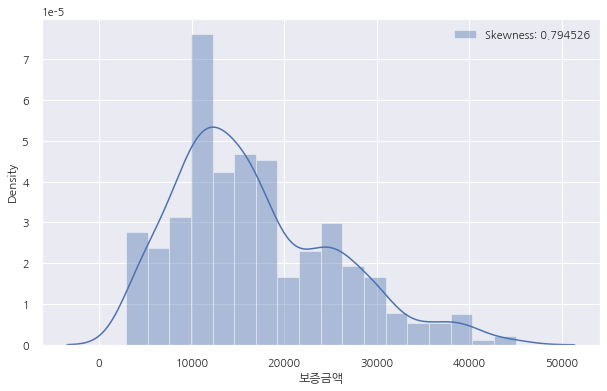

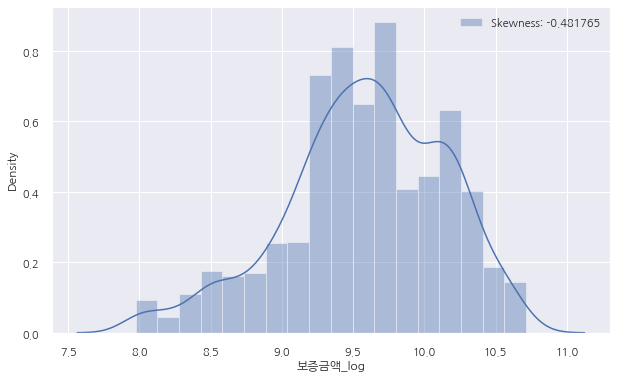

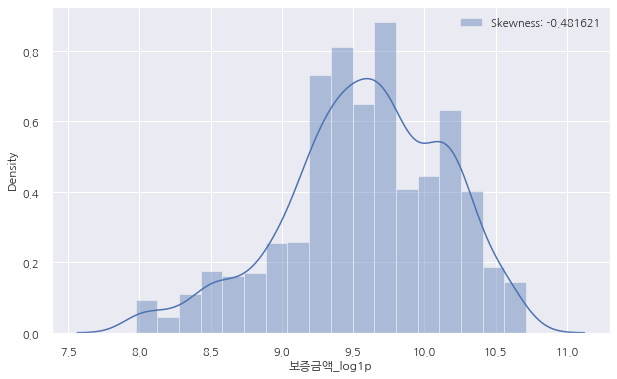

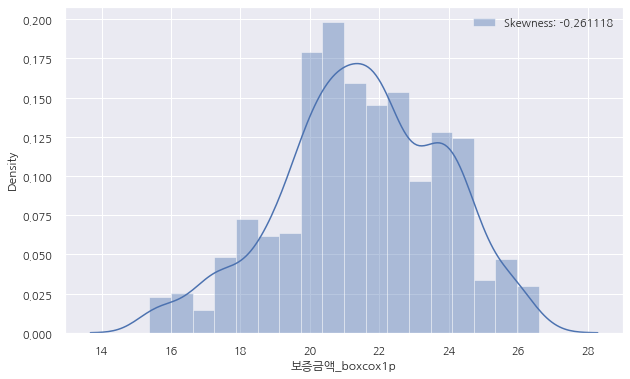

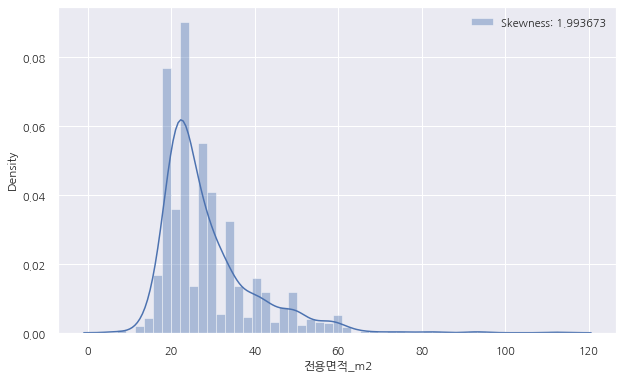

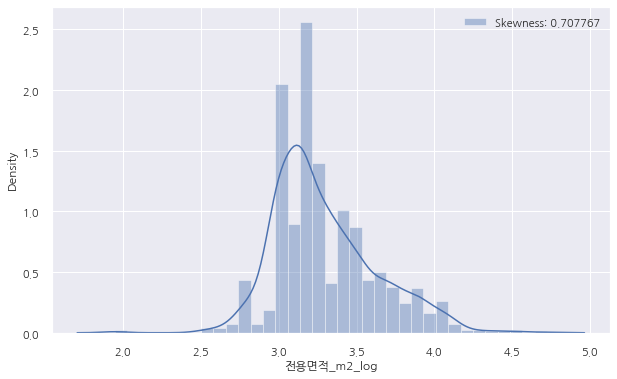

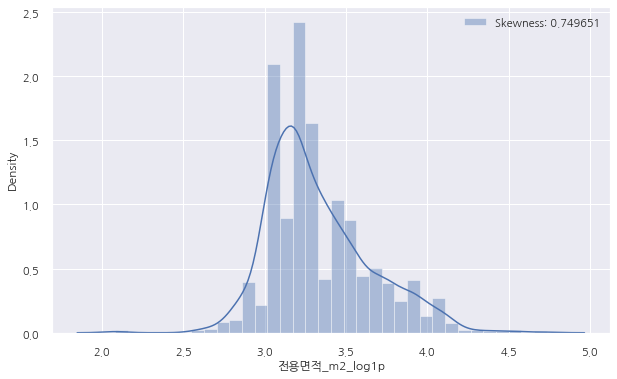

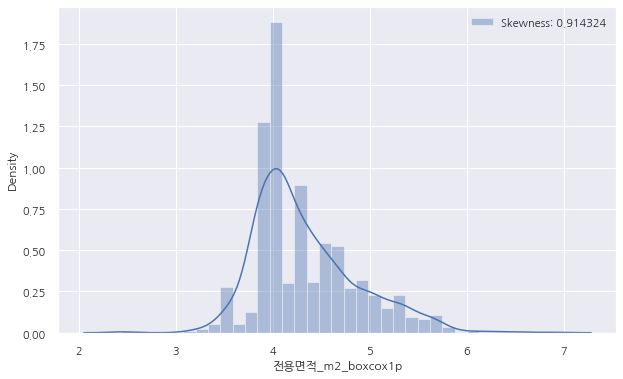

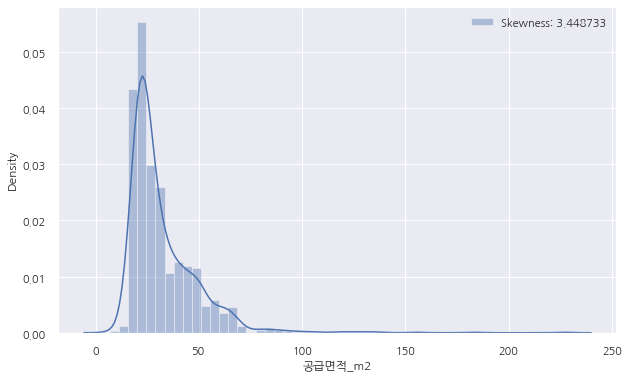

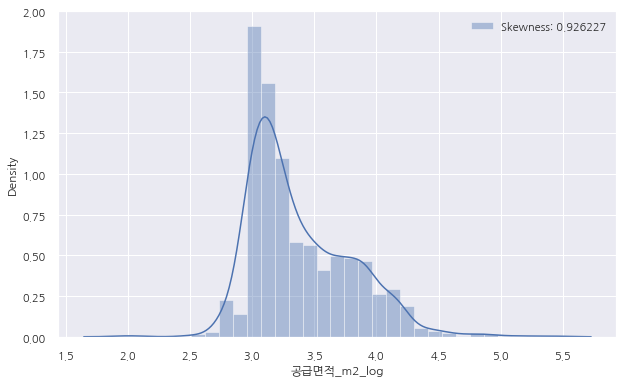

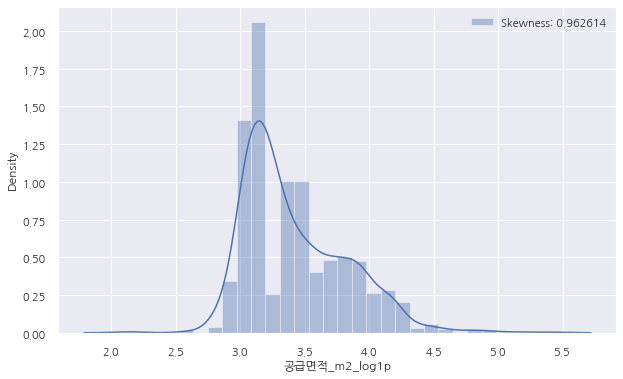

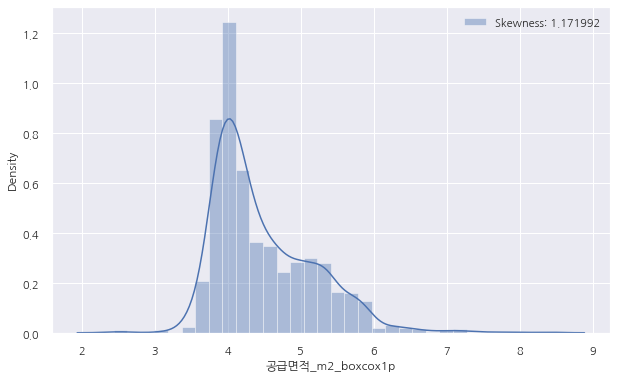

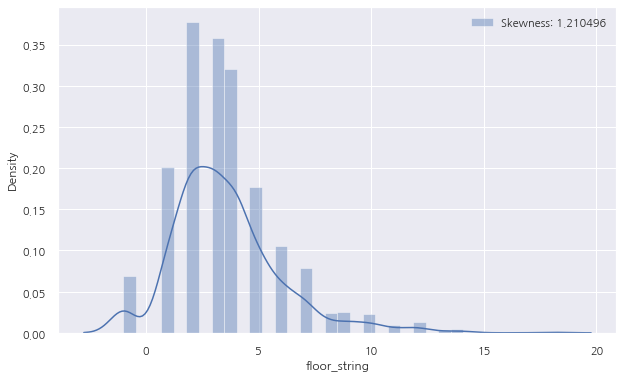

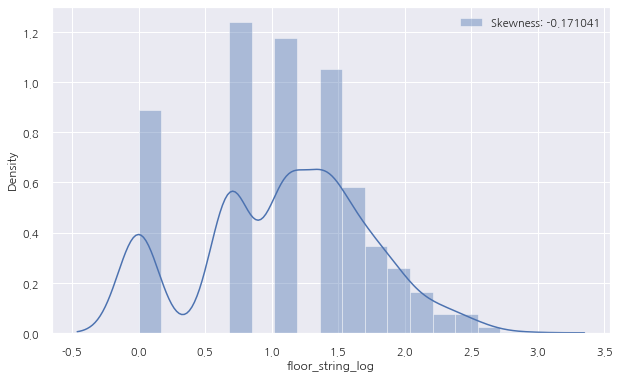

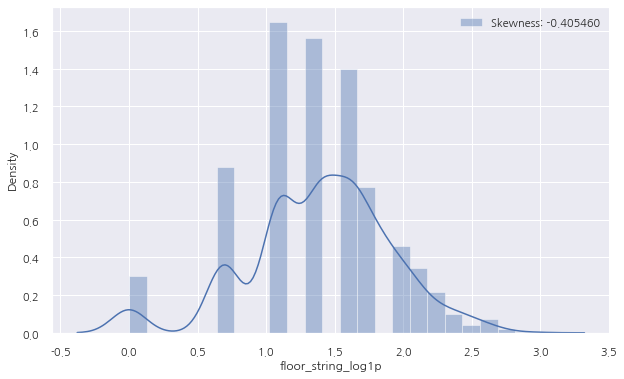

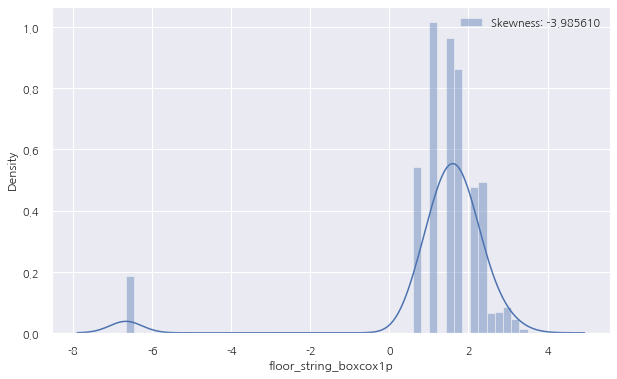

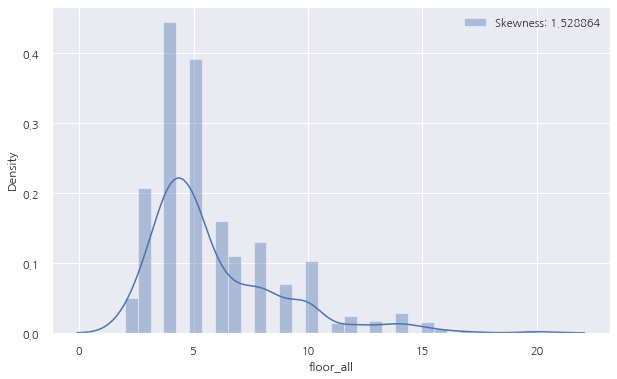

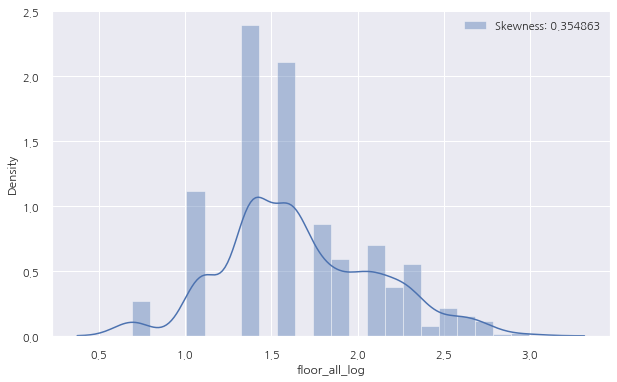

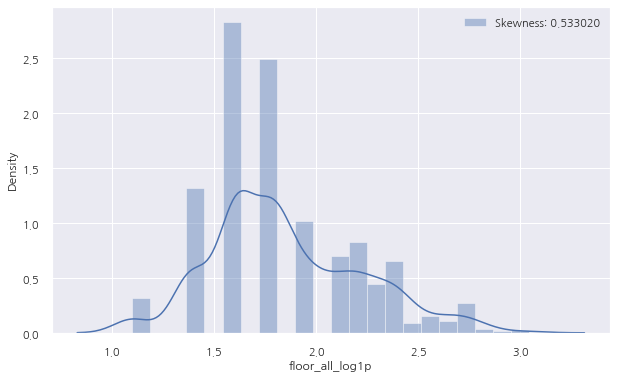

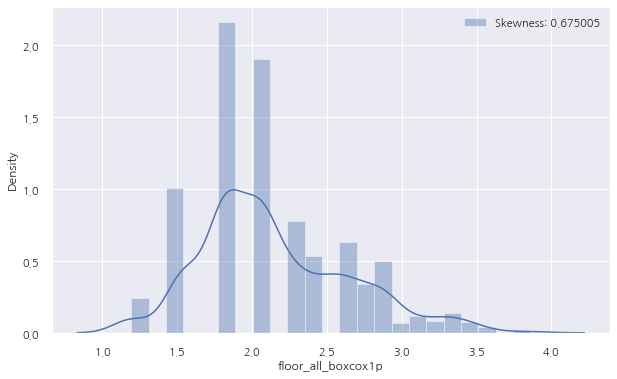

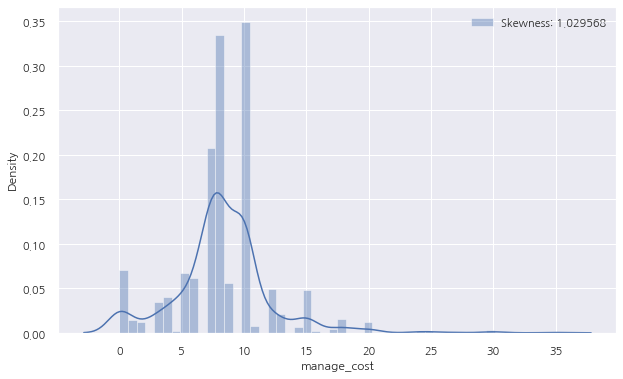

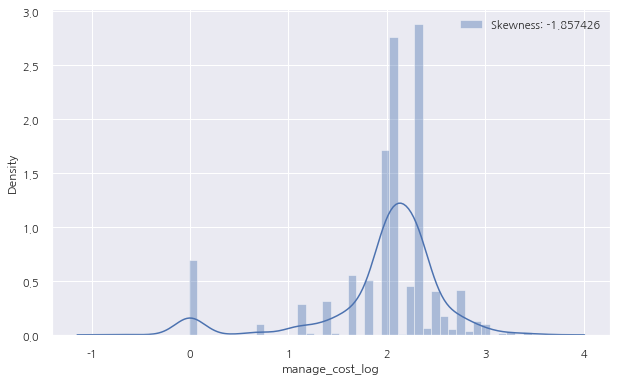

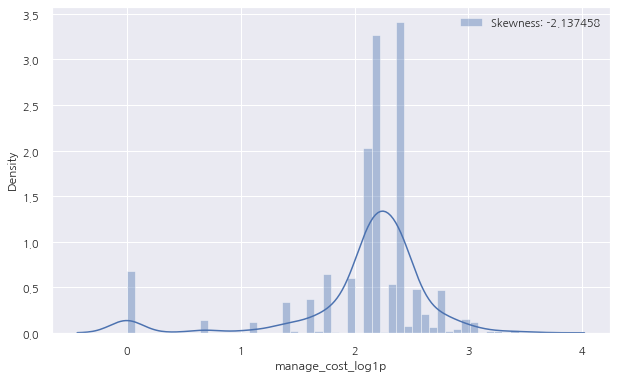

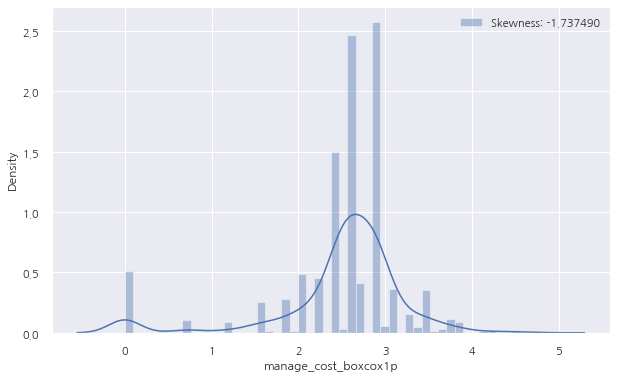

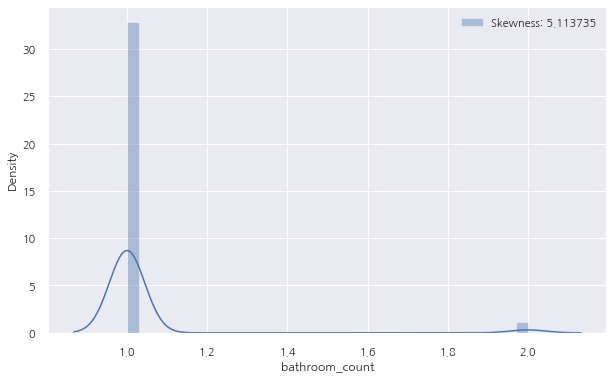

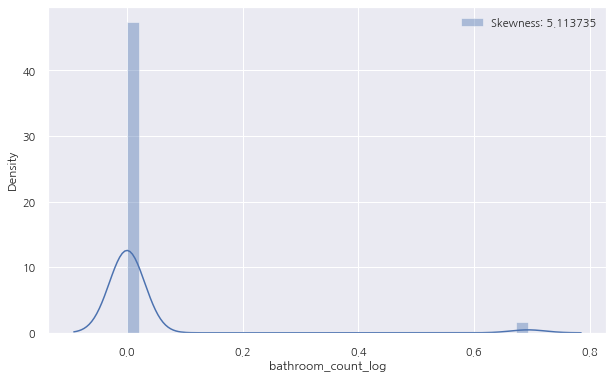

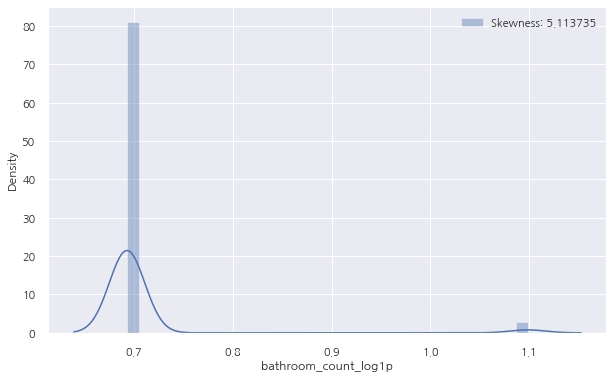

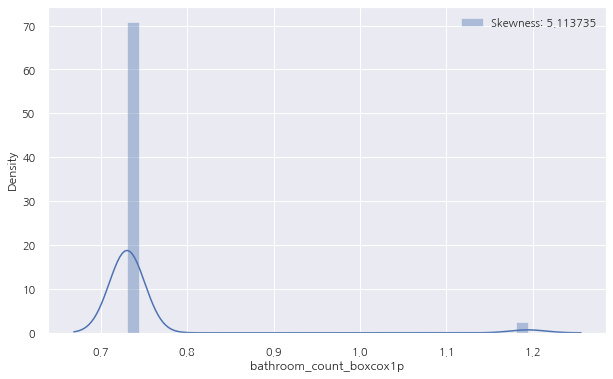

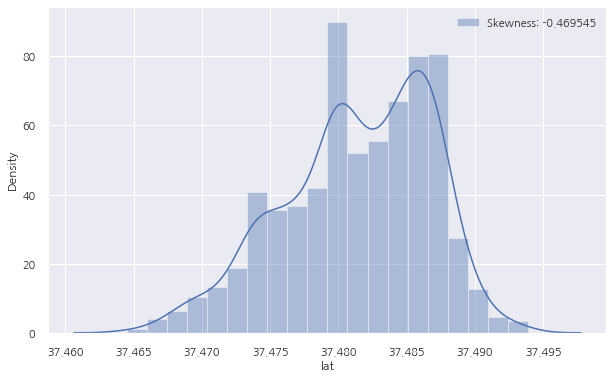

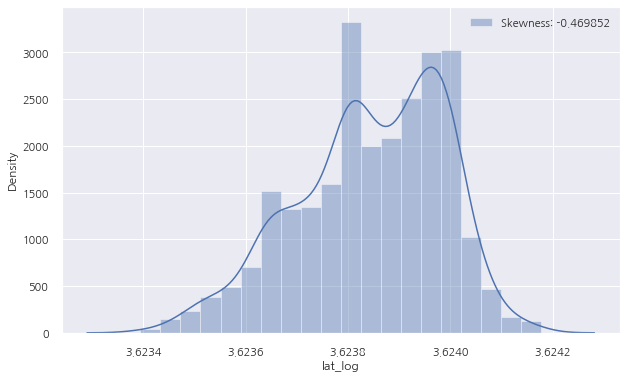

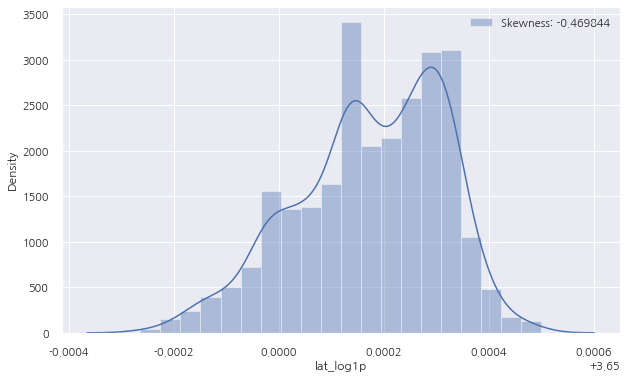

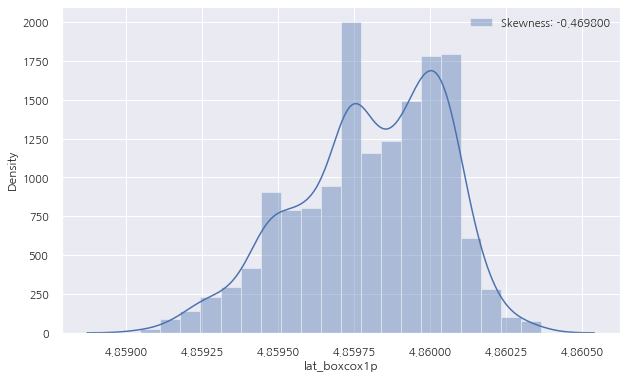

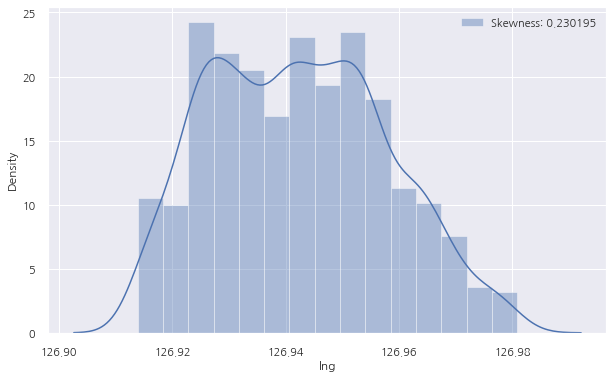

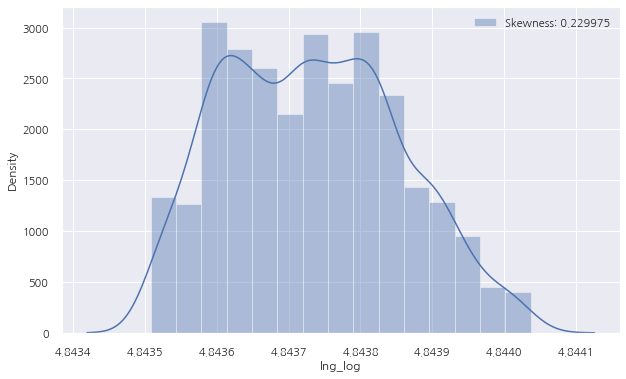

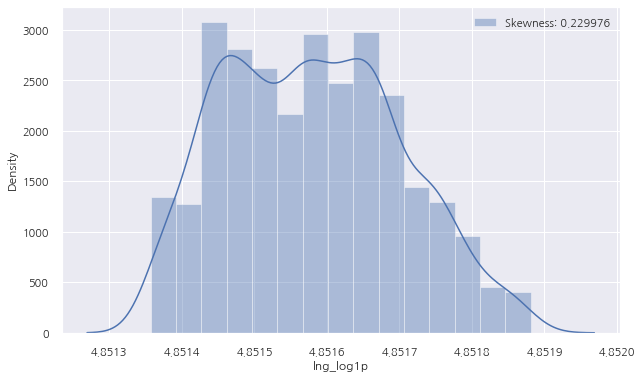

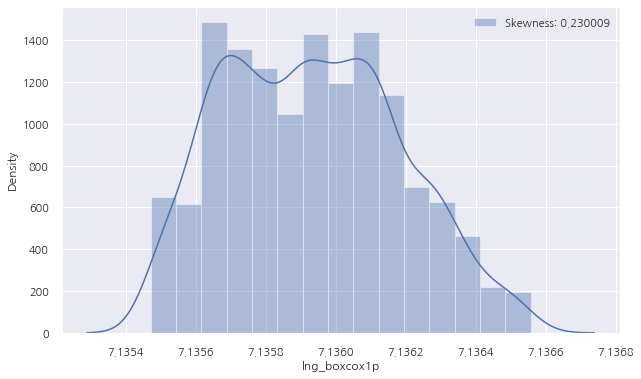

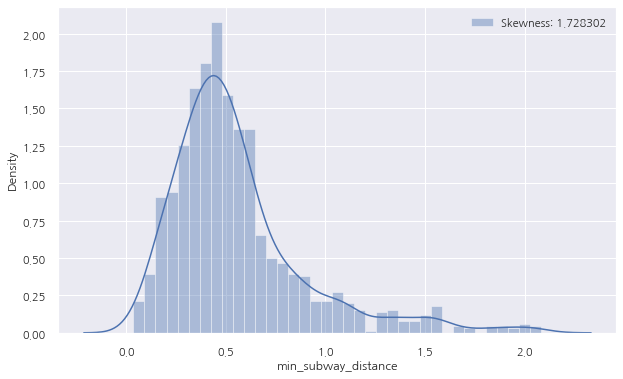

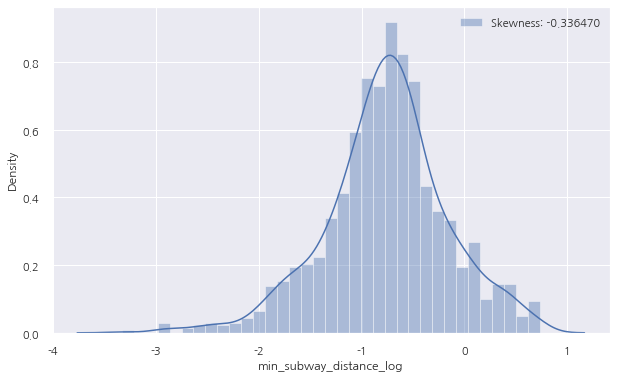

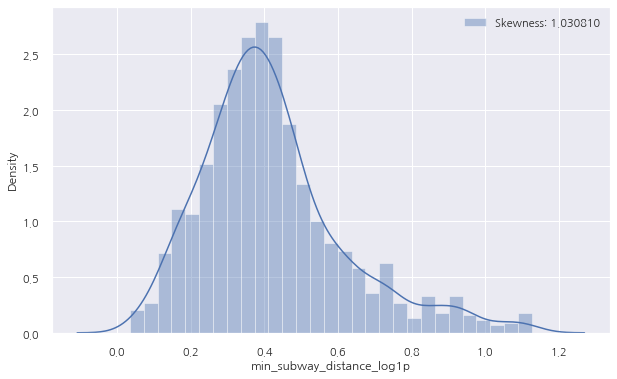

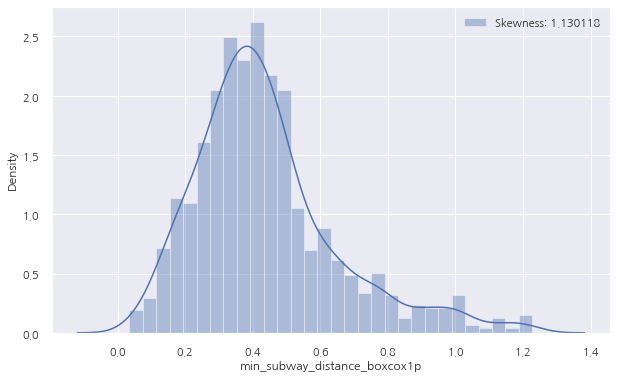

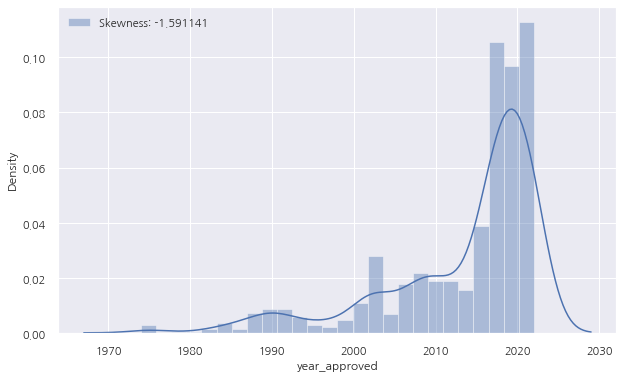

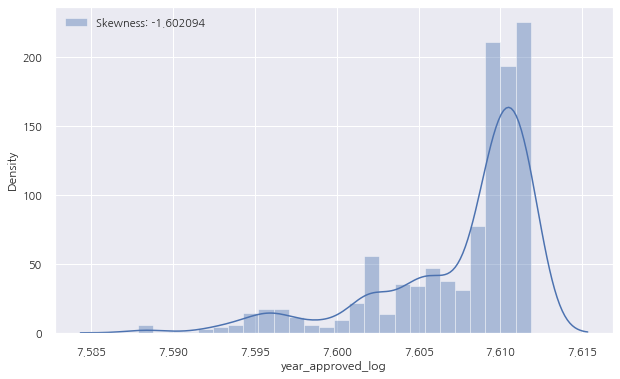

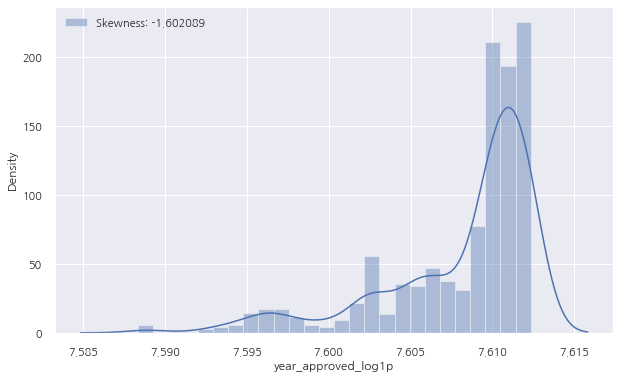

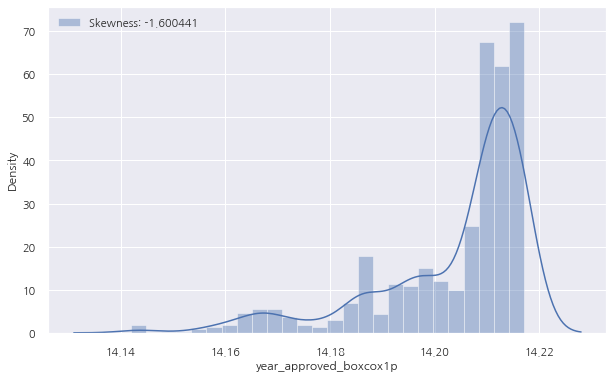

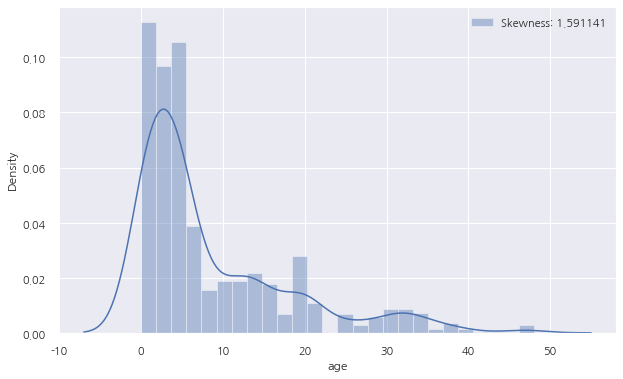

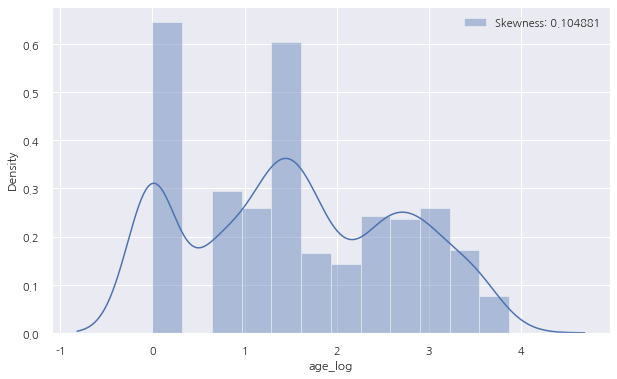

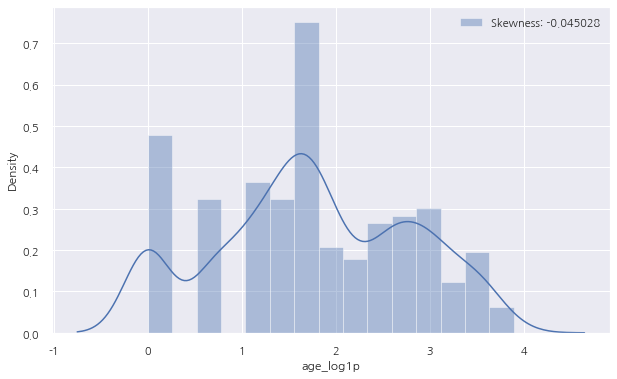

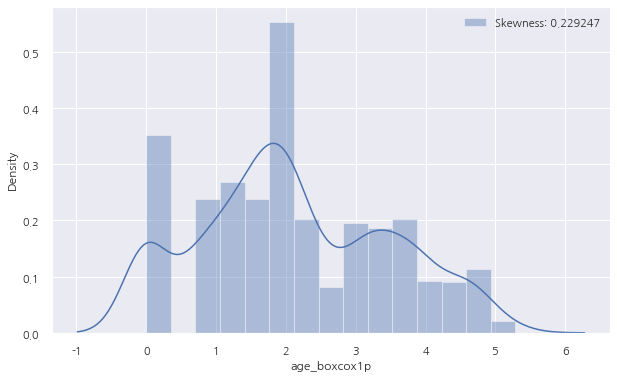

In [37]:
for i in numerical_feats:
  check_skew_kurt(df_int_approve, i, False)


보증금액
9.582793256123974 0.5628305317916349


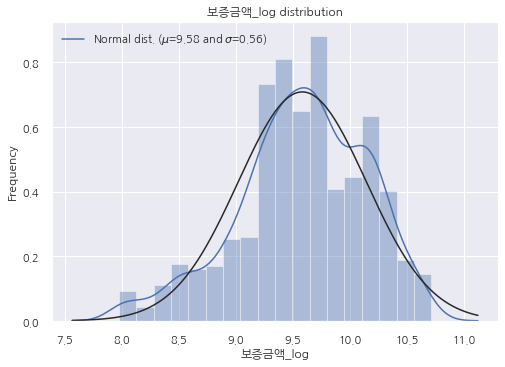

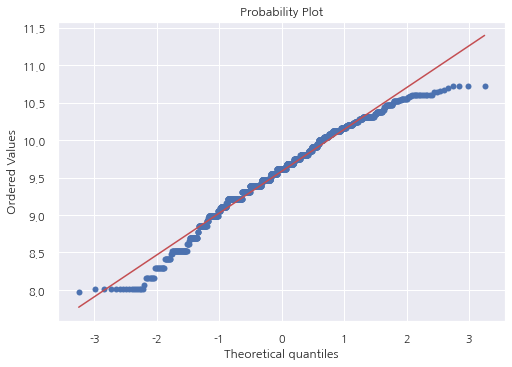

9.582875103351542 0.5627786200906228


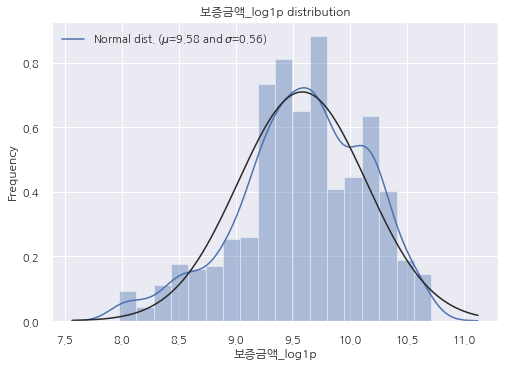

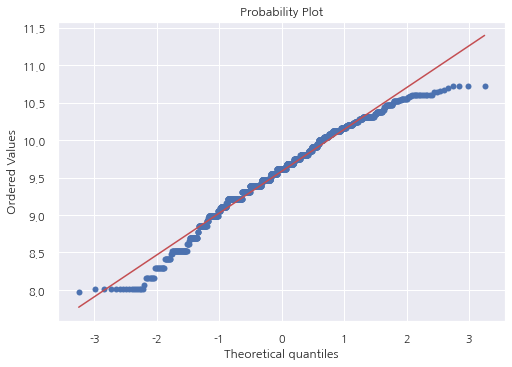

21.4979423605724 2.333023546178303


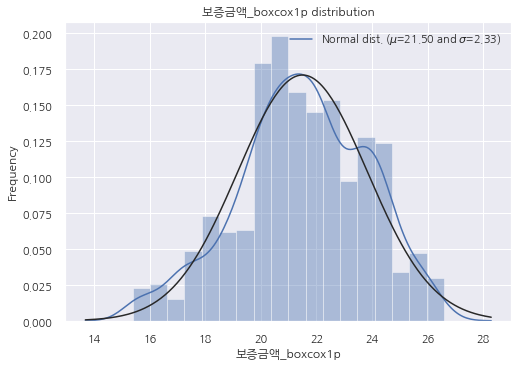

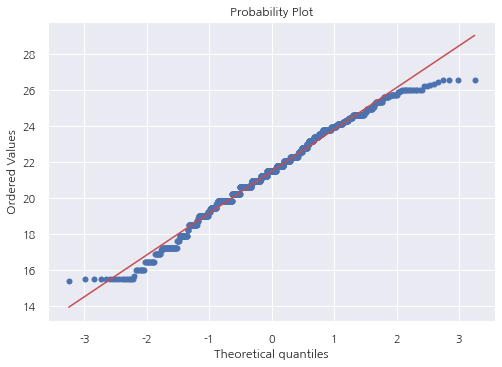

전용면적_m2
3.2901021395310783 0.3300090723948659


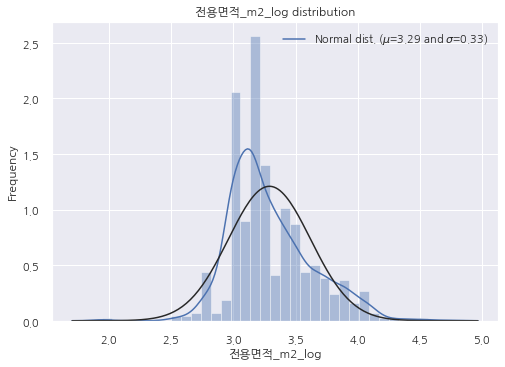

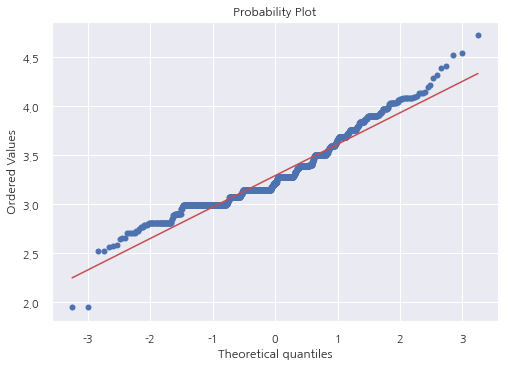

3.328473971472827 0.31880914192220244


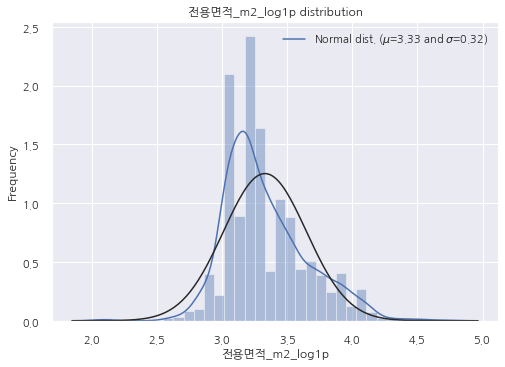

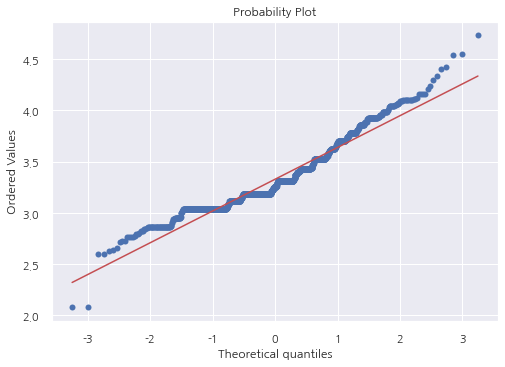

4.329517887280112 0.535786428007589


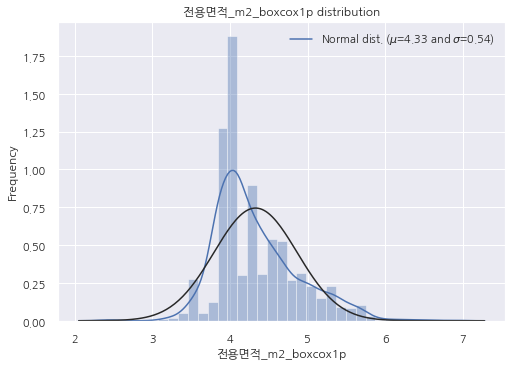

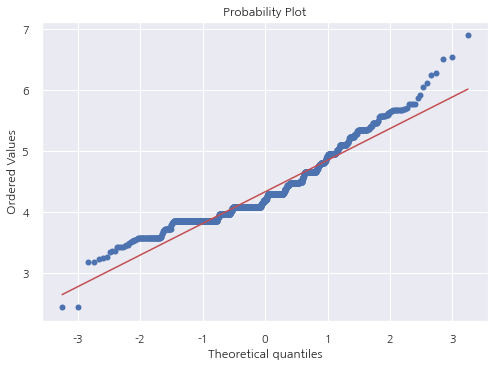

공급면적_m2
3.3846636365575287 0.4106576552911669


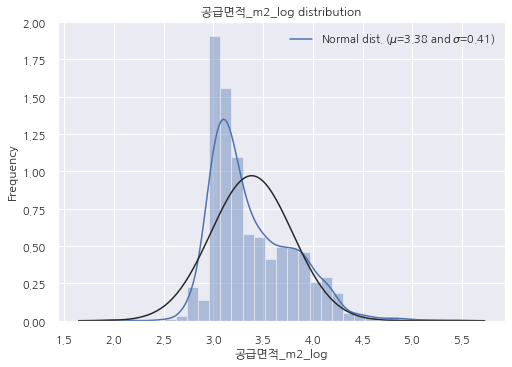

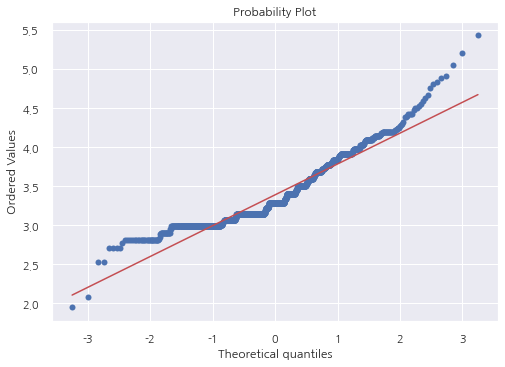

3.4204555480207306 0.39853125728907635


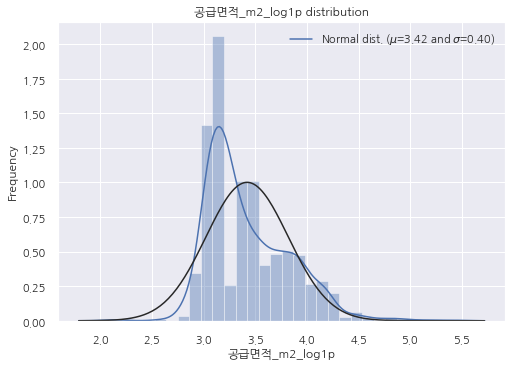

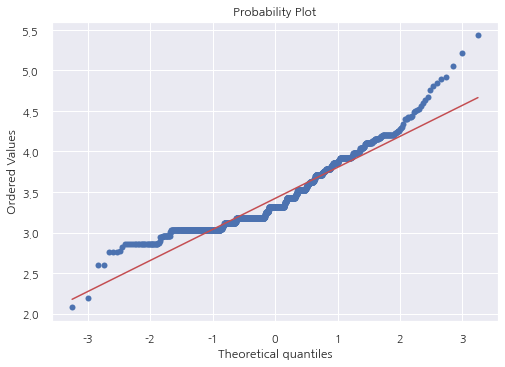

4.489695730948936 0.6872428365886152


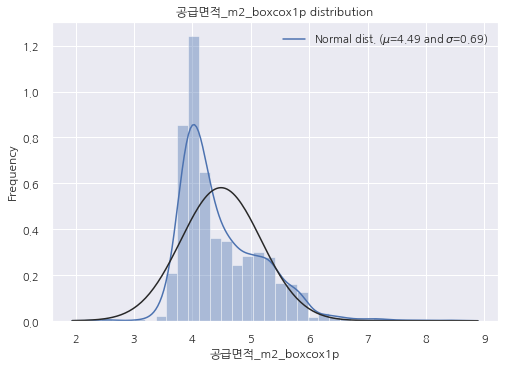

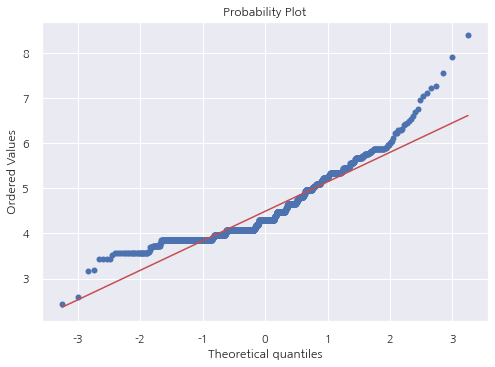

room_type
elevator
floor_string
1.0958070218549187 0.6332498698053891


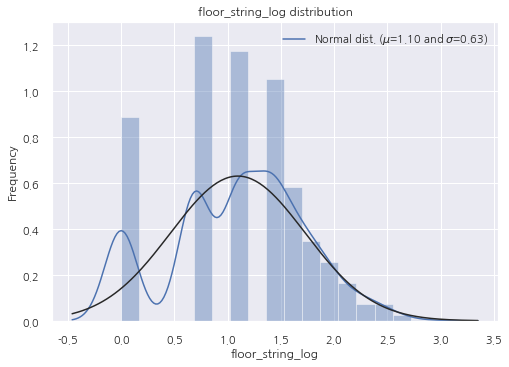

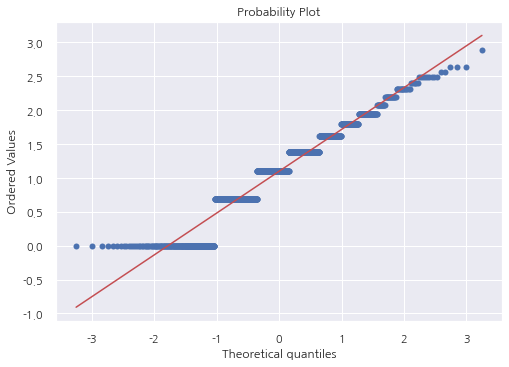

1.3952667381895034 0.5192105183532622


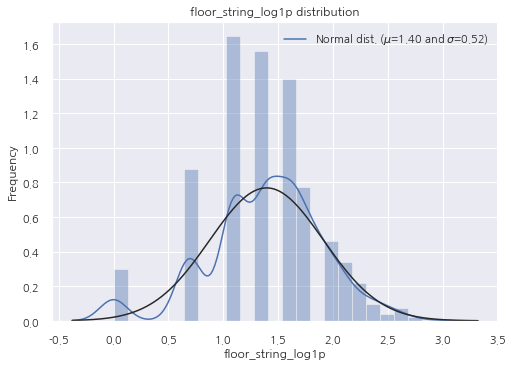

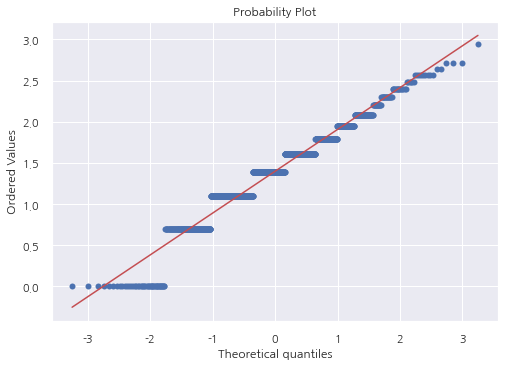

1.3192372862197153 1.692167190666897


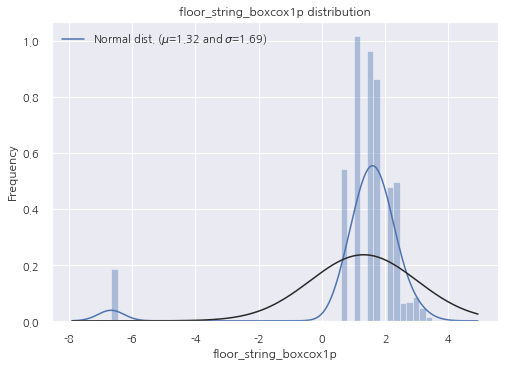

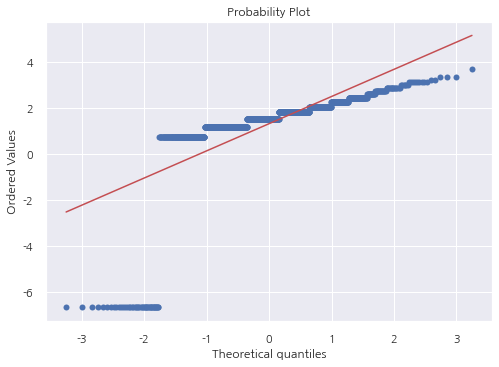

floor_all
1.6652177892842899 0.43938929500199475


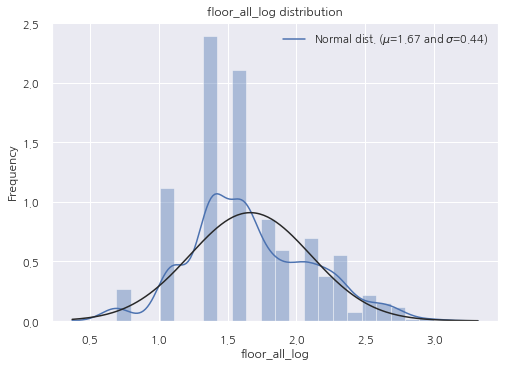

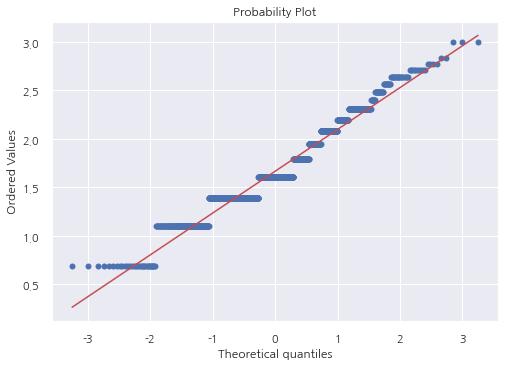

1.8510320881033664 0.3708892919960165


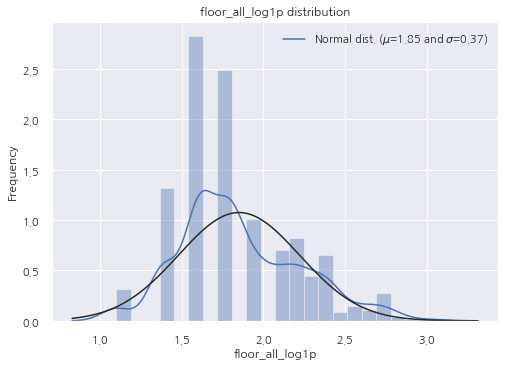

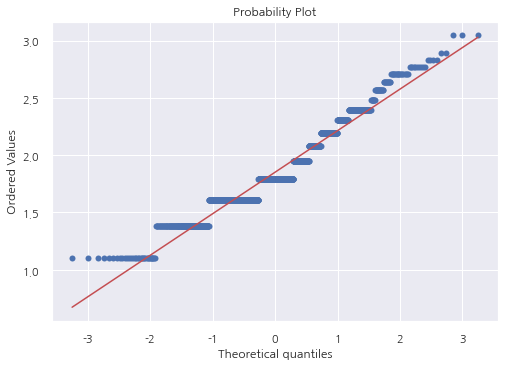

2.1473001014099675 0.4979269365576028


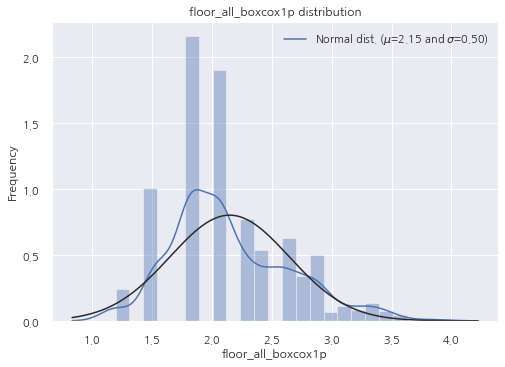

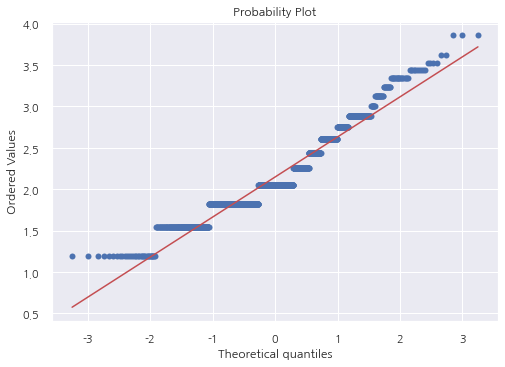

manage_cost
1.9798831758254967 0.6220575596239514


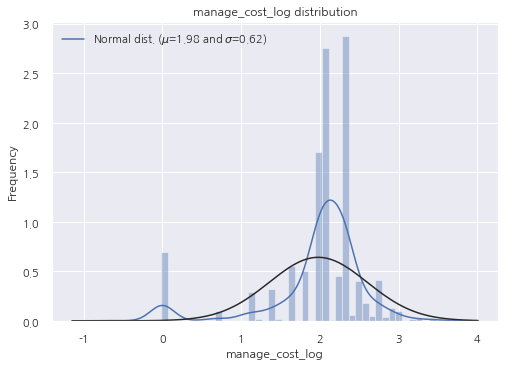

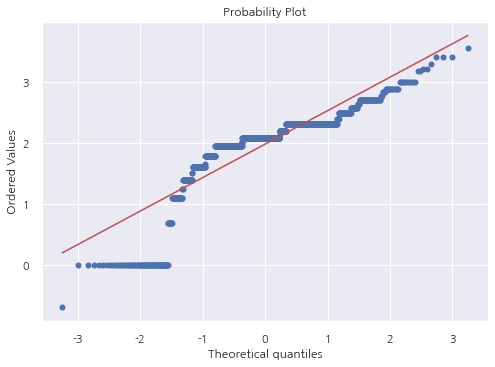

2.10287095149809 0.5965276183875668


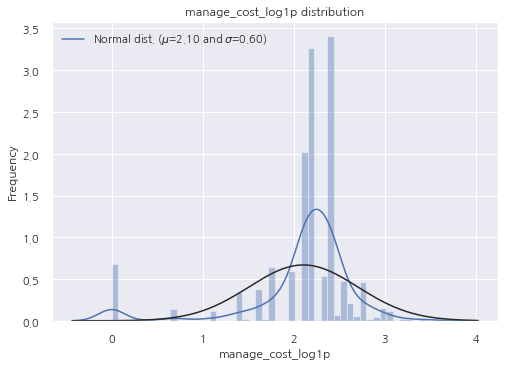

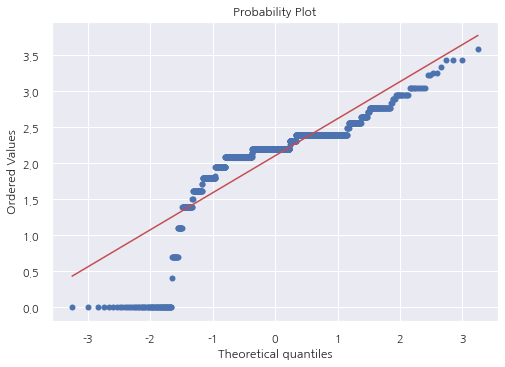

2.5067799629406355 0.7503827366558284


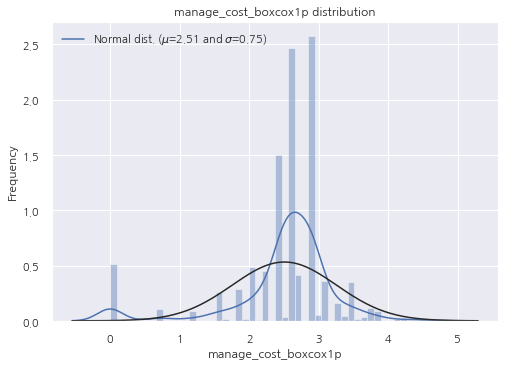

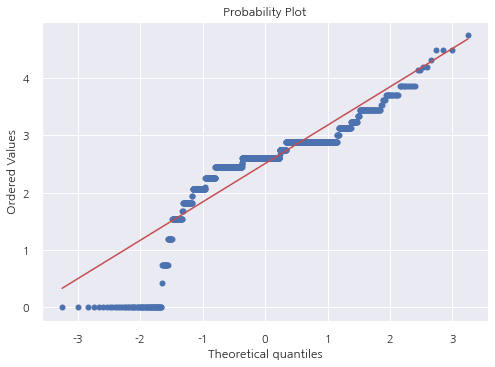

is_premium
room_gubun_code
bathroom_count
0.023861489842953613 0.12637307352073734


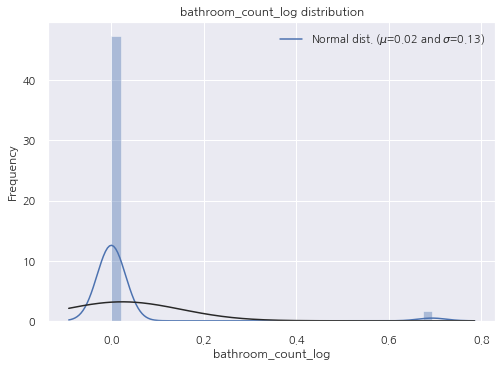

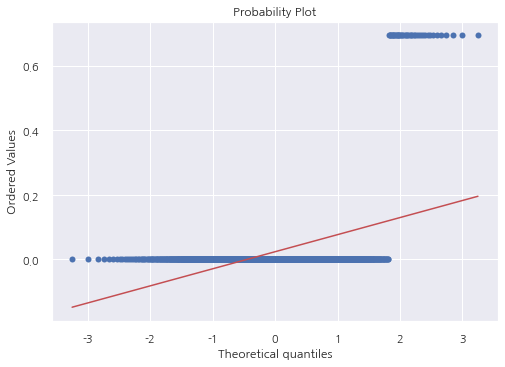

0.7071052573294119 0.07392350911050903


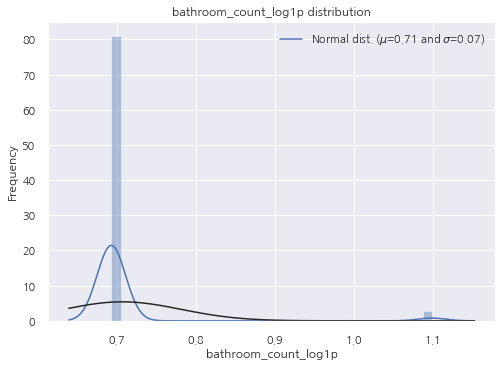

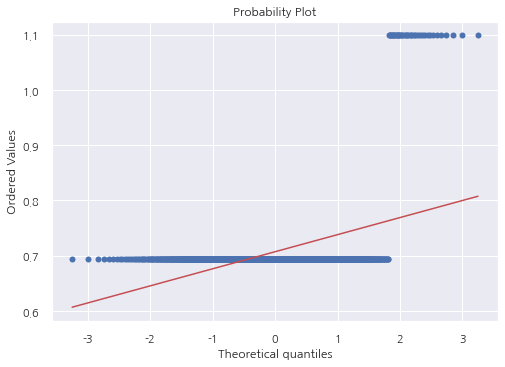

0.7464312698066485 0.08456893327616304


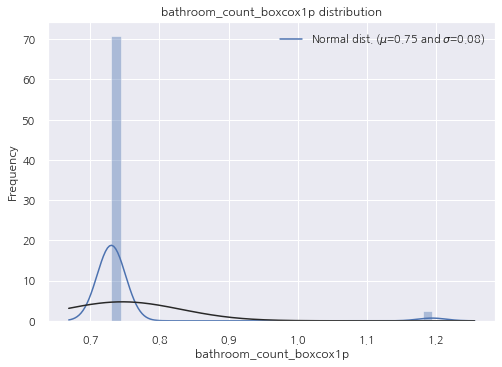

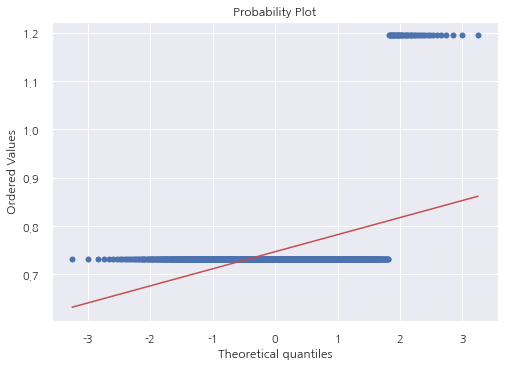

popular
lat
3.6238444440042294 0.00014317549955682564


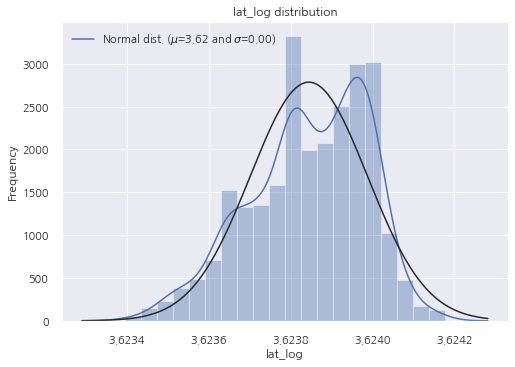

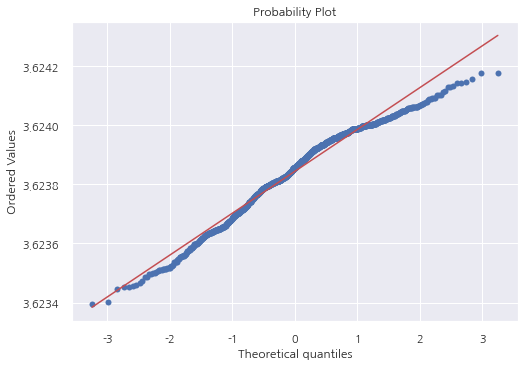

3.650174651517152 0.0001394547348102616


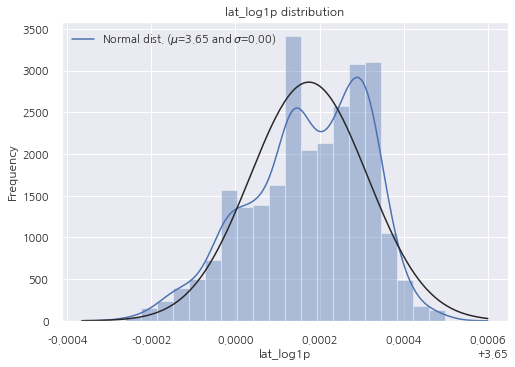

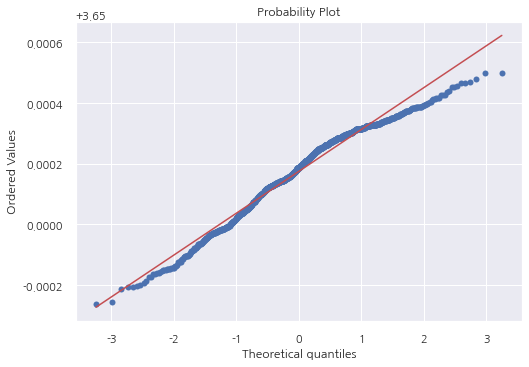

4.859803947420366 0.0002411119520568525


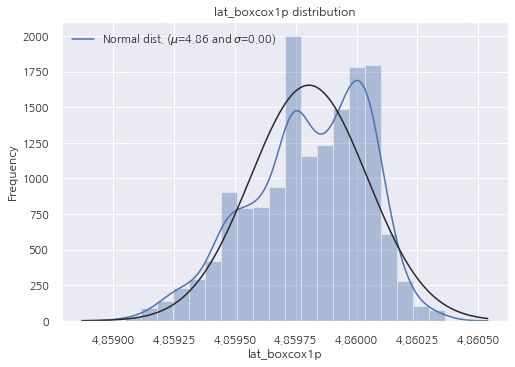

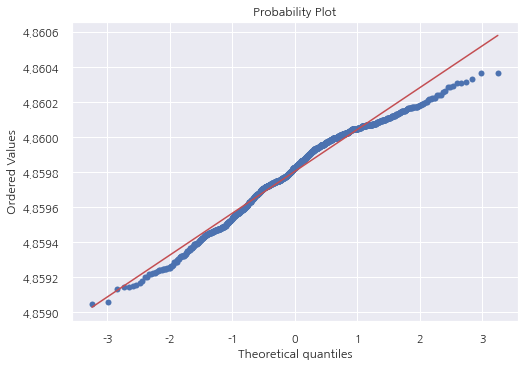

lng
4.843732981398194 0.00012173283980782969


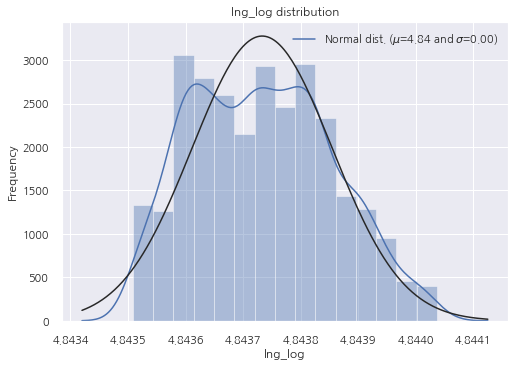

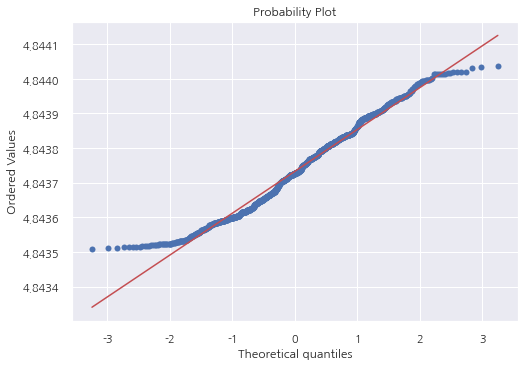

4.851579707411802 0.00012078138659641555


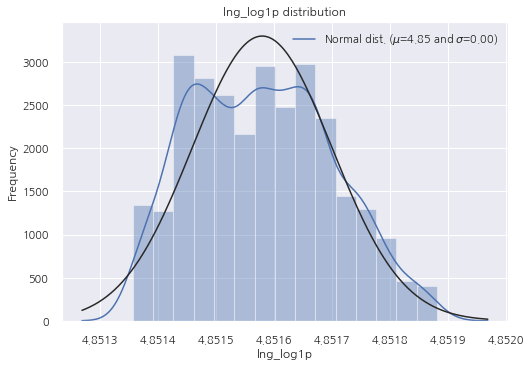

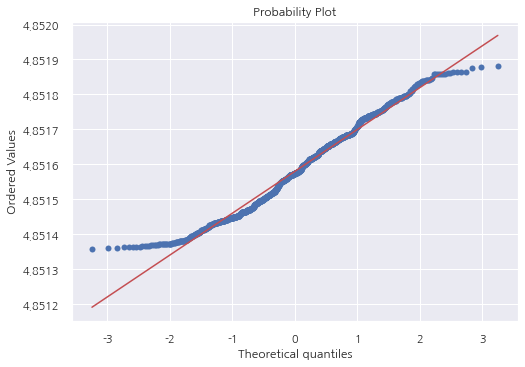

7.135932794309396 0.0002500650855262977


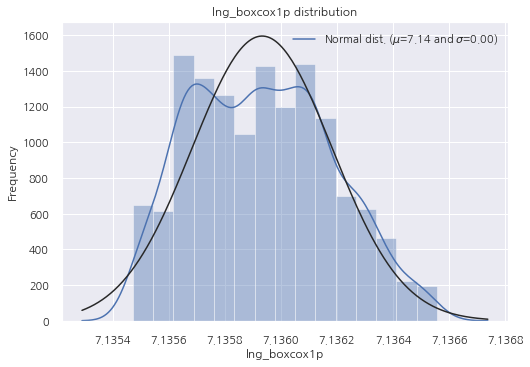

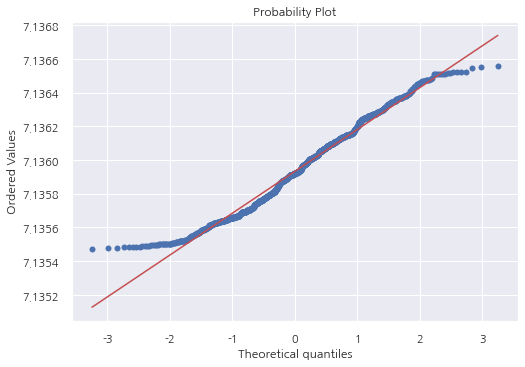

min_subway_distance
-0.758632685016972 0.5957384747839511


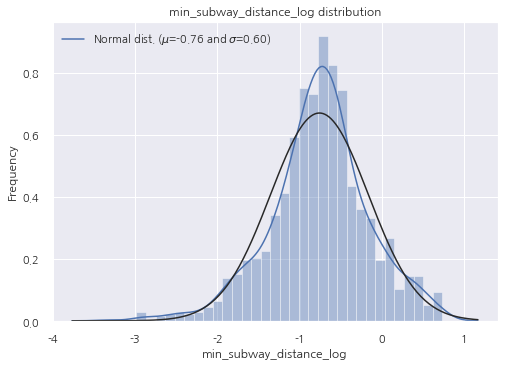

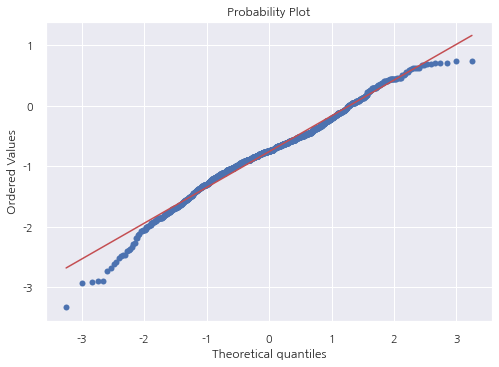

0.42071644971228916 0.19632968022616268


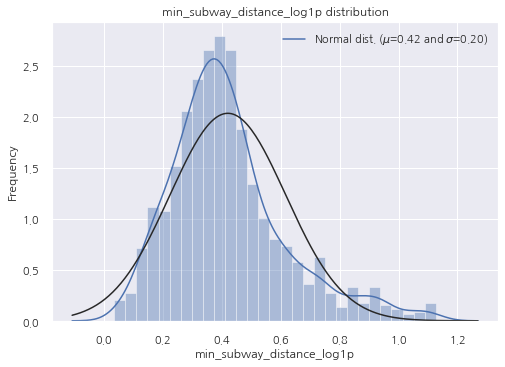

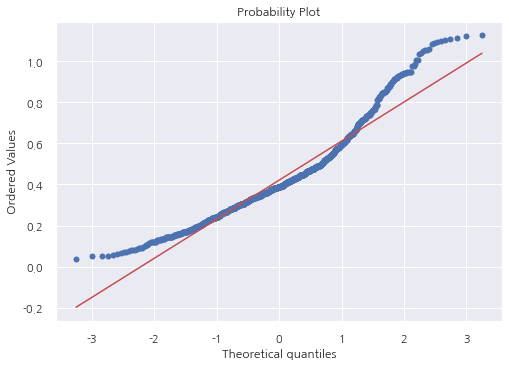

0.4373866439866336 0.2124722441363441


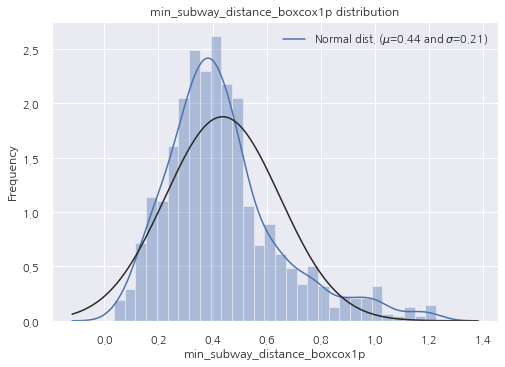

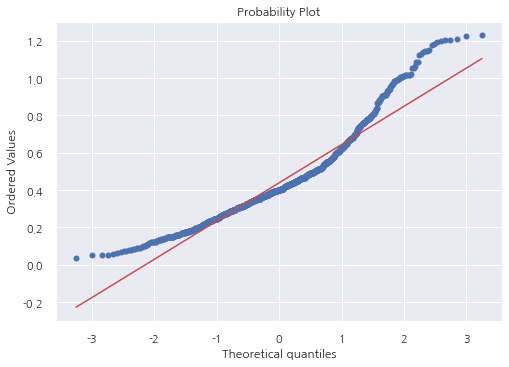

대출가능
year_approved
7.607608954547406 0.004790084043342898


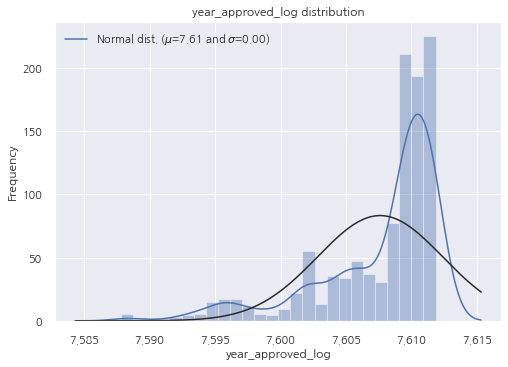

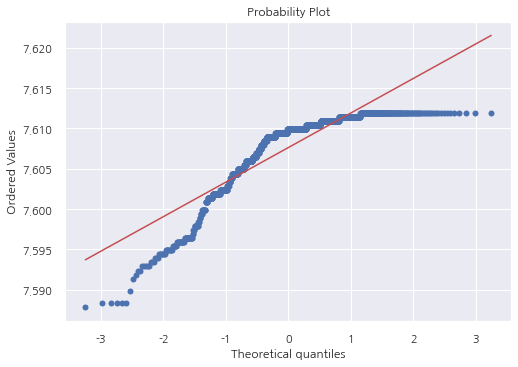

7.608105494932142 0.004787697036541383


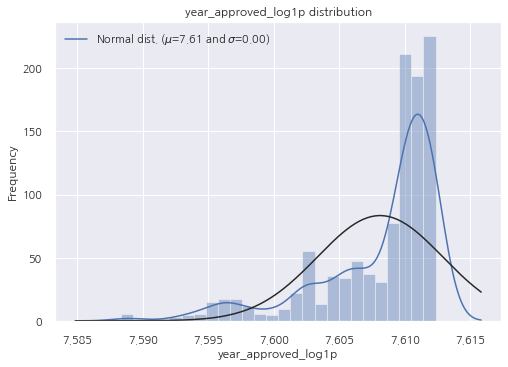

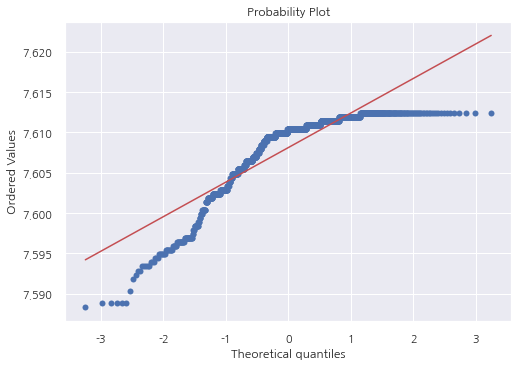

14.203820566092661 0.014979628173192632


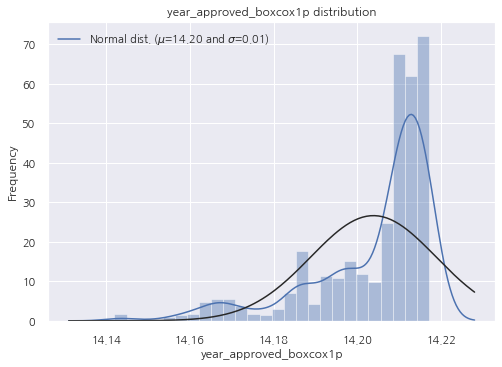

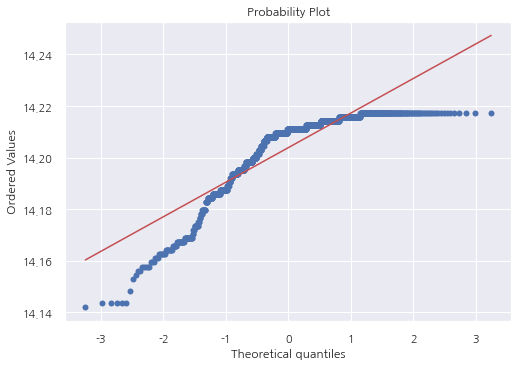

age
1.567228999153806 1.122131530314208


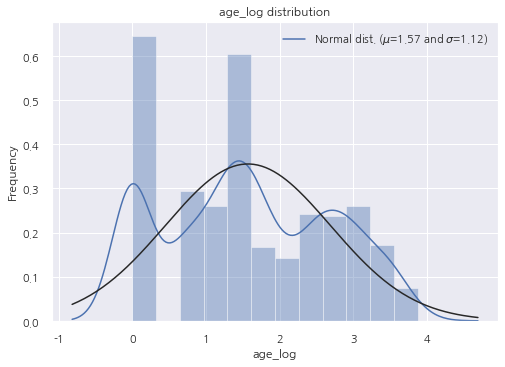

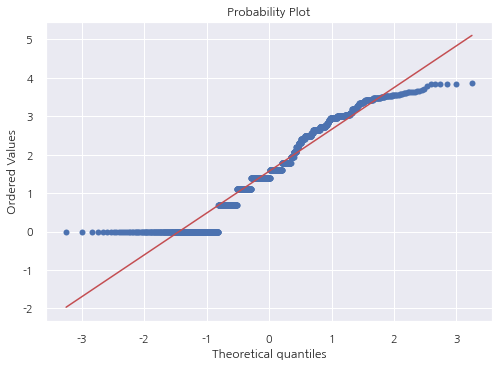

1.7601095745965127 1.03350304144755


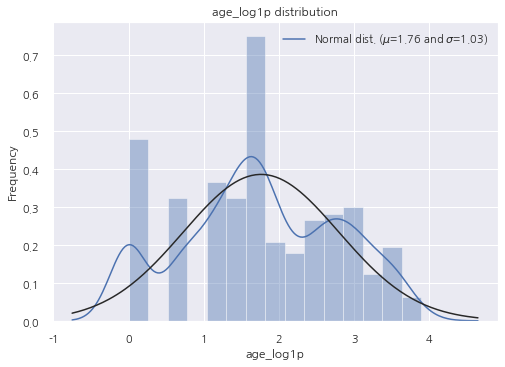

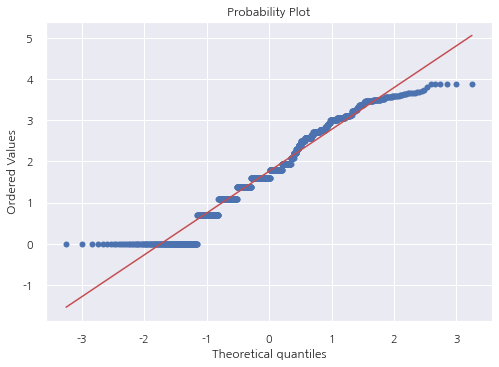

2.118859819235598 1.3576627396780296


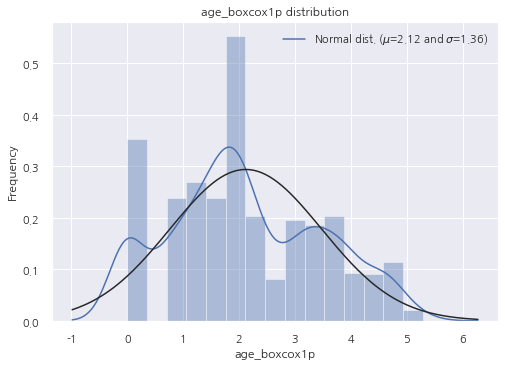

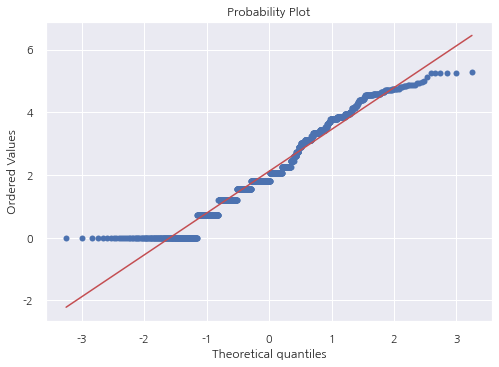

In [38]:
for i in numerical_feats:
  print(i)
  compare_with_norm_dist_per_transform(df_int_approve, i)

필요 없는 데이터 삭제 (dataframe 에서만 삭제)

In [39]:

# column_to_delete = ['item_id', 'user_no', '대지권면적_m2', 'approve_date', 
#                     'from_snu','from_bong', 'from_nak', 'from_sin', 'from_sindaebang',
#                     'sales_type', 'sales_title', 'service_type', 'address', 'jibunAddress',
#                     'local1', 'local2', 'local3', 'title', 'description', 'random_location',
#                     'movein_date', 'updated_at', 'link','floor', 'room_type_code']

# for c in column_to_delete:
#   df_int_approve.drop(c, axis = 1, inplace=True)


In [40]:
df_int_approve.head()

보증금액  전용면적_m2  공급면적_m2  room_type parking  elevator room_direction  \
0   6500    23.14    23.14          2   1대 가능         1             NW   
1  10000    23.14    23.14          2   1대 가능         1             NW   
2   7500    19.83    19.83          2     불가능         1              N   
3  32000    49.59    56.20          5   1대 가능         0              E   
4  16000    23.14    23.14          2   1대 가능         1             SE   

   floor_string  floor_all  manage_cost  ...  room_gubun_code  bathroom_count  \
0             4          6          9.0  ...                1               1   
1             5          8         10.0  ...                1               1   
2             7          8          8.0  ...                1               1   
3             3          4          3.0  ...                4               1   
4             3          5          7.0  ...                1               1   

   residence_type popular        lat         lng  min_subway_distance  대출가능  \
0       제2종근린생활시설       0  37.486289  126.925103             0.430276     0   
1       제2종근린생활시설       0  37.485280  126.928283             0.134499     0   
2          교육연구시설       0  37.485507  126.933050             0.342854     0   
3           다가구주택       0  37.481208  126.961984             0.472160     1   
4            단독주택       0  37.483278  126.916627             0.575179     1   

   year_approved  age  
0           2011   11  
1           2021    1  
2           2008   14  
3           2017    5  
4           2022    0  

[5 rows x 21 columns]

In [41]:
dummies = ['room_gubun_code', 'parking', 'elevator','room_direction', 'room_type' ]

## 더미 변수 생성

머신러닝 방식 -> 더미변수 T개



In [42]:
df_ml = pd.get_dummies(df_int_approve, columns = dummies)
df_ml.head()
list(df_ml.columns)


['보증금액',
 '전용면적_m2',
 '공급면적_m2',
 'floor_string',
 'floor_all',
 'manage_cost',
 'is_premium',
 'bathroom_count',
 'residence_type',
 'popular',
 'lat',
 'lng',
 'min_subway_distance',
 '대출가능',
 'year_approved',
 'age',
 'room_gubun_code_1',
 'room_gubun_code_2',
 'room_gubun_code_4',
 'parking_1대 가능',
 'parking_불가능',
 'elevator_0',
 'elevator_1',
 'room_direction_E',
 'room_direction_N',
 'room_direction_NE',
 'room_direction_NW',
 'room_direction_S',
 'room_direction_SE',
 'room_direction_SW',
 'room_direction_W',
 'room_type_1',
 'room_type_2',
 'room_type_3',
 'room_type_4',
 'room_type_5',
 'room_type_6']

In [43]:
dummies_to_drop = ['room_gubun_code_1' , 'parking_불가능', 'elevator_0', 'room_direction_N', 'room_type_1']
# dummies_to_drop = ['room_gubun_code_1' , 'parking_불가능', 'elevator_0', 'room_direction_N']

## 도입한 더미 변수
is_premium, popular, 대출가능, room_type, room_direction, parking, elevator

회귀 방식 -> 더미변수 T-1개

In [44]:
# reference 더미 변수 제거
df_reg = df_ml.drop(axis=1, columns=dummies_to_drop)
df_reg.rename(columns = {'parking_1대 가능' : 'parking_1'}, inplace = True)
list(df_reg.columns)
# df_reg.residence_type.value_counts()

['보증금액',
 '전용면적_m2',
 '공급면적_m2',
 'floor_string',
 'floor_all',
 'manage_cost',
 'is_premium',
 'bathroom_count',
 'residence_type',
 'popular',
 'lat',
 'lng',
 'min_subway_distance',
 '대출가능',
 'year_approved',
 'age',
 'room_gubun_code_2',
 'room_gubun_code_4',
 'parking_1',
 'elevator_1',
 'room_direction_E',
 'room_direction_NE',
 'room_direction_NW',
 'room_direction_S',
 'room_direction_SE',
 'room_direction_SW',
 'room_direction_W',
 'room_type_2',
 'room_type_3',
 'room_type_4',
 'room_type_5',
 'room_type_6']

# 헤도닉 가격 모형 (다중 회귀)
선형, 세미로그, 선형-로그, 로그-로그 중에 선택하기.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

import statsmodels.api as sm
from patsy import dmatrices
def multi_reg(df, formula):
  y, X = dmatrices(formula, data= df, return_type='dataframe')
  mod = sm.OLS(y, X)
  res = mod.fit()
  residuals = res.resid
  predicted = res.fittedvalues
  observed = y
  print(res.summary())

  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns
  vif.round(1)

  plt.rc('figure', figsize=(12, 7))

  plt.text(0, 0.05, str(res.summary()), {'fontsize': 10}) # approach improved by OP -> monospace!
  
  
  plt.axis('off')
  plt.tight_layout()
  plt.show()
  return vif


                            OLS Regression Results                            
Dep. Variable:           np.log(보증금액)   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     137.2
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          2.09e-281
Time:                        16:27:24   Log-Likelihood:                -308.00
No. Observations:                1191   AIC:                             656.0
Df Residuals:                    1171   BIC:                             757.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.8451    

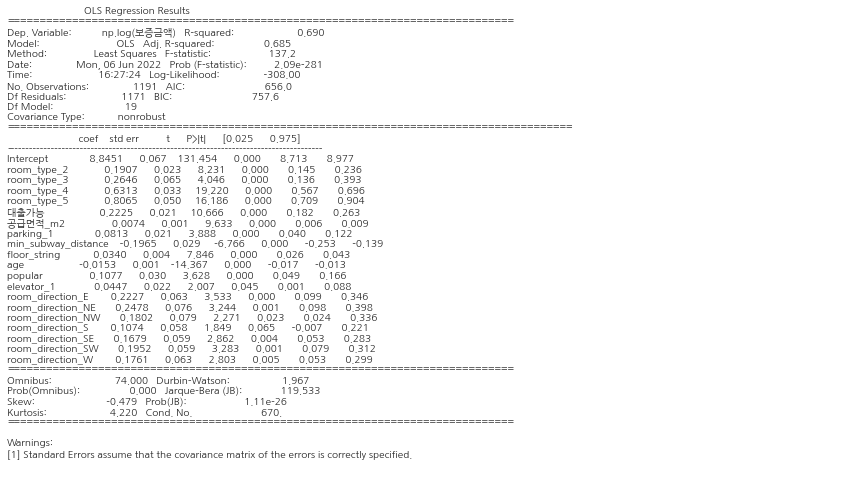

In [46]:
# v = multi_reg(df_reg, '보증금액_log ~ room_type \
# + 대출가능 + 공급면적_m2 + parking_1 + elevator_1 + min_subway_distance + floor_string\
# + room_direction_E + room_direction_NE + room_direction_NW + room_direction_S + room_direction_SE + room_direction_SW + room_direction_W')
# v = multi_reg(df_reg, '보증금액 ~ room_type_2 + room_type_3 +room_type_4 +room_type_5 \
# + 대출가능 + 공급면적_m2 + parking_1 + elevator_1 + min_subway_distance + floor_string \
# + room_gubun_code_2 + room_gubun_code_4')
v = multi_reg(df_reg, 'np.log(보증금액) ~ room_type_2 + room_type_3 +room_type_4 +room_type_5 \
+ 대출가능 + 공급면적_m2 + parking_1 + min_subway_distance + floor_string + age + popular + elevator_1 \
+ room_direction_E + room_direction_NE + room_direction_NW + room_direction_S + room_direction_SE + room_direction_SW + room_direction_W')

In [47]:
v

VIF Factor             features
0    53.984240            Intercept
1     1.450857          room_type_2
2     1.129871          room_type_3
3     2.392062          room_type_4
4     1.983012          room_type_5
5     1.233679                 대출가능
6     2.109615              공급면적_m2
7     1.278035            parking_1
8     1.178034  min_subway_distance
9     1.312696         floor_string
10    1.249451                  age
11    1.069528              popular
12    1.434657           elevator_1
13    4.071188     room_direction_E
14    2.093564    room_direction_NE
15    1.903070    room_direction_NW
16    8.427208     room_direction_S
17    7.362068    room_direction_SE
18    6.529192    room_direction_SW
19    4.072425     room_direction_W

# 지도에 시각화

In [48]:
!pip install geopandas folium==0.12.1
import geopandas as gpd
import folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:

map = folium.Map(location=[snu_lat, snu_lng], zoom_start=14)

for n in df_int_approve.index:
  icon = folium.Icon(color='green', icon='circle', prefix='fa') if df_int_approve['대출가능'][n] else folium.Icon(color='red', icon='xmark', prefix='fa')
  folium.Marker([df_int_approve['lat'][n],df_int_approve['lng'][n]], popup=df_int_approve['대출가능'][n],tooltip=df_int_approve['보증금액'][n], icon=icon).add_to(map)
    
map

# 머신러닝 방식의 분석
[참조한 Kaggle 튜토리얼](https://www.kaggle.com/code/subinium/subinium-tutorial-house-prices-advanced)
## labelencoding

In [50]:
#수치형 값들 중 범주형인 특성들을 변환
from sklearn.preprocessing import LabelEncoder


df_int_approve['room_type'] = df_int_approve['room_type'].astype(str)
df_int_approve['room_gubun_code'] = df_int_approve['room_gubun_code'].astype(str)
df_int_approve['popular'] = df_int_approve['popular'].astype(str)
df_int_approve['elevator'] = df_int_approve['elevator'].astype(str)
df_int_approve['대출가능'] = df_int_approve['대출가능'].astype(str)

ordering_categorical = ['room_type', 'room_direction', 'room_gubun_code', 'residence_type']

tmp = pd.DataFrame()
for c in ordering_categorical:
    lbl = LabelEncoder()
    lbl.fit(list(df_int_approve[c].values)) 
    # tmp[c] = lbl.transform(list(df_int_approve[c].values))
    df_int_approve[c] = lbl.transform(list(df_int_approve[c].values))

# shape        
print('Shape all_data: {}'.format(df_int_approve.shape))
# ordering_categorical = ['room_type', 'room_direction', 'floor_string', 'floor_all', 'room_gubun_code']


Shape all_data: (1191, 21)


In [51]:
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew


# drop_list = ['lat', 'lng', 'year_approved', 'residence_type', 'is_premium', 'popular' ]
drop_list = ['lat', 'lng', 'year_approved', 'is_premium', 'residence_type']
df_int_approve.drop(axis=1, columns=drop_list, inplace=True)
df_int_approve.columns

Index(['보증금액', '전용면적_m2', '공급면적_m2', 'room_type', 'parking', 'elevator',
       'room_direction', 'floor_string', 'floor_all', 'manage_cost',
       'room_gubun_code', 'bathroom_count', 'popular', 'min_subway_distance',
       '대출가능', 'age'],
      dtype='object')

In [52]:
numeric_feats = df_int_approve.dtypes[df_int_approve.dtypes != "object"].index

# 수치형 데이터에서 skewness 체크
skewed_feats = df_int_approve[numeric_feats].apply(lambda x : skew(x)).sort_values(ascending=False)

print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness



Skew in numerical features: 



Skew
bathroom_count       5.107292
공급면적_m2              3.444388
전용면적_m2              1.991162
min_subway_distance  1.726124
age                  1.589136
floor_all            1.526937
floor_string         1.208971
manage_cost          1.028270
보증금액                 0.793525
room_gubun_code      0.656825
room_type            0.553824
room_direction      -0.953994

In [53]:
from scipy.special import boxcox1p, inv_boxcox1p
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df_int_approve[feat] = boxcox1p(df_int_approve[feat], lam)
    

There are 12 skewed numerical features to Box Cox transform


In [54]:
df_int_approve

보증금액   전용면적_m2   공급면적_m2  room_type parking elevator  \
0     18.213642  4.081127  4.081127   0.730463   1대 가능        1   
1     19.874209  4.081127  4.081127   0.730463   1대 가능        1   
2     18.753396  3.845982  3.845982   0.730463     불가능        1   
3     24.933056  5.342654  5.565916   1.820334   1대 가능        0   
4     21.812732  4.081127  4.081127   0.730463   1대 가능        1   
...         ...       ...       ...        ...     ...      ...   
1186  22.782058  4.386652  4.478473   1.540963   1대 가능        1   
1187  20.610004  4.081127  4.081127   0.730463   1대 가능        0   
1188  21.538377  4.808785  4.808785   1.194318   1대 가능        0   
1189  21.538377  4.081127  4.081127   0.000000     불가능        1   
1190  23.964056  4.166662  6.611621   1.540963   1대 가능        1   

      room_direction  floor_string  floor_all  manage_cost  room_gubun_code  \
0           1.540963      1.820334   2.259674     2.750250         0.000000   
1           1.540963      2.055642   2.602594     2.885846         0.000000   
2           0.730463      2.440268   2.602594     2.602594         0.000000   
3           0.000000      1.540963   1.820334     1.540963         1.194318   
4           2.055642      1.540963   2.055642     2.440268         0.000000   
...              ...           ...        ...          ...              ...   
1186        2.055642      1.820334   2.055642     3.701973         1.194318   
1187        2.055642      1.540963   1.820334     2.602594         0.000000   
1188        1.820334      1.820334   1.820334     2.602594         0.000000   
1189        0.000000      2.055642   2.055642     2.602594         0.000000   
1190        2.259674      1.194318   2.440268     2.885846         1.194318   

      bathroom_count popular  min_subway_distance 대출가능       age  
0           0.730463       0             0.367647    0  3.011340  
1           0.730463       0             0.127393    0  0.730463  
2           0.730463       0             0.301412    0  3.340760  
3           0.730463       0             0.398168    1  2.055642  
4           0.730463       0             0.470211    1  0.000000  
...              ...     ...                  ...  ...       ...  
1186        0.730463       0             0.309594    1  0.000000  
1187        0.730463       0             0.478124    1  0.730463  
1188        0.730463       0             0.604524    1  1.540963  
1189        0.730463       0             0.231314    0  1.820334  
1190        0.730463       0             0.365739    0  0.000000  

[1191 rows x 16 columns]

In [55]:

df_int_approve = pd.get_dummies(df_int_approve)
print(df_int_approve.shape)

(1191, 20)


In [56]:
df_int_approve

보증금액   전용면적_m2   공급면적_m2  room_type  room_direction  floor_string  \
0     18.213642  4.081127  4.081127   0.730463        1.540963      1.820334   
1     19.874209  4.081127  4.081127   0.730463        1.540963      2.055642   
2     18.753396  3.845982  3.845982   0.730463        0.730463      2.440268   
3     24.933056  5.342654  5.565916   1.820334        0.000000      1.540963   
4     21.812732  4.081127  4.081127   0.730463        2.055642      1.540963   
...         ...       ...       ...        ...             ...           ...   
1186  22.782058  4.386652  4.478473   1.540963        2.055642      1.820334   
1187  20.610004  4.081127  4.081127   0.730463        2.055642      1.540963   
1188  21.538377  4.808785  4.808785   1.194318        1.820334      1.820334   
1189  21.538377  4.081127  4.081127   0.000000        0.000000      2.055642   
1190  23.964056  4.166662  6.611621   1.540963        2.259674      1.194318   

      floor_all  manage_cost  room_gubun_code  bathroom_count  \
0      2.259674     2.750250         0.000000        0.730463   
1      2.602594     2.885846         0.000000        0.730463   
2      2.602594     2.602594         0.000000        0.730463   
3      1.820334     1.540963         1.194318        0.730463   
4      2.055642     2.440268         0.000000        0.730463   
...         ...          ...              ...             ...   
1186   2.055642     3.701973         1.194318        0.730463   
1187   1.820334     2.602594         0.000000        0.730463   
1188   1.820334     2.602594         0.000000        0.730463   
1189   2.055642     2.602594         0.000000        0.730463   
1190   2.440268     2.885846         1.194318        0.730463   

      min_subway_distance       age  parking_1대 가능  parking_불가능  elevator_0  \
0                0.367647  3.011340              1            0           0   
1                0.127393  0.730463              1            0           0   
2                0.301412  3.340760              0            1           0   
3                0.398168  2.055642              1            0           1   
4                0.470211  0.000000              1            0           0   
...                   ...       ...            ...          ...         ...   
1186             0.309594  0.000000              1            0           0   
1187             0.478124  0.730463              1            0           1   
1188             0.604524  1.540963              1            0           1   
1189             0.231314  1.820334              0            1           0   
1190             0.365739  0.000000              1            0           0   

      elevator_1  popular_0  popular_1  대출가능_0  대출가능_1  
0              1          1          0       1       0  
1              1          1          0       1       0  
2              1          1          0       1       0  
3              0          1          0       0       1  
4              1          1          0       0       1  
...          ...        ...        ...     ...     ...  
1186           1          1          0       0       1  
1187           0          1          0       0       1  
1188           0          1          0       0       1  
1189           1          1          0       1       0  
1190           1          1          0       1       0  

[1191 rows x 20 columns]

In [57]:
df_int_approve.columns
df_inverse_loan = df_int_approve
# df_inverse_loan['대출가능_1'] , df_inverse_loan['대출가능_0'] = df_inverse_loan['대출가능_0'], df_inverse_loan['대출가능_1']
train_df, test_df = train_test_split(df_int_approve, test_size=0.2, random_state=42)

In [58]:
train_df.columns
y_train = train_df.보증금액.values
y_train

array([24.628632  , 21.53837675, 21.24800984, 24.40509834, 22.7820584 ,
       21.81273165, 21.53837675, 22.7820584 , 22.7820584 , 21.81273165,
       19.87420946, 17.25366897, 21.81273165, 23.30694069, 22.7820584 ,
       20.25634043, 22.32033101, 17.91675243, 22.7820584 , 23.20607644,
       23.78438863, 19.87420946, 25.62874019, 20.93944591, 19.00064485,
       20.93944591, 19.23509145, 21.53837675, 21.24800984, 16.87868021,
       20.61000376, 18.75339594, 22.07287985, 22.07287985, 15.48970493,
       24.93305617, 24.628632  , 20.61000376, 24.46989745, 21.81273165,
       22.9983596 , 19.87420946, 23.20607644, 21.94448112, 22.32033101,
       17.91675243, 24.628632  , 21.24800984, 22.06018551, 23.78438863,
       21.53837675, 20.93944591, 22.7820584 , 20.61000376, 21.24800984,
       16.0078249 , 20.61000376, 21.24800984, 22.32033101, 26.00861713,
       22.7820584 , 20.93944591, 24.51800008, 23.20607644, 23.46442904,
       20.25634043, 23.20607644, 21.53837675, 20.61000376, 20.93

## Modeling
### Import libraries

In [59]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

### 교차검증 방법 선택
K - Fold (k겹 검증)

In [60]:
# Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df.values)
    rmse = np.sqrt(-cross_val_score(model, train_df.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return (rmse)

### Base Models
- `LASSO Regression`: 이상치에 매우 민감 -> 이상치를 좀 더 규제하기 위해 pipeline에 RobustScaler() method 이용

- `Elastic Net Regression`: 이상치 제어를 위해 똑같이 pipeline에 RobustScaler() method 이용

- `Kernel Ridge Regression`
- `Gradient Boosting Regression`: huber loss func로 이상치를 관리. 이 손실함수는 다른 손실함수에 비해 이상치에 덜 민감.
- `XGBoost`: 하이퍼 파라미터를 bayesian optimization으로 최적화




In [61]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4,
                                   max_features='sqrt', min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state=5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

### Base model scores

In [62]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.0007 (0.0000)

ElasticNet score: 0.0009 (0.0001)

Kernel Ridge score: 0.0127 (0.0014)

Gradient Boosting score: 0.2112 (0.0092)

Xgboost score: 0.1222 (0.0076)

LGBM score: 0.3274 (0.0166)



## Stacking models


### Simplest Stacking approach : Averaging base models
우선 모델들의 성능을 평균하여 사용하는 것으로 시작. class를 만들어 캡슐화하고, 코드를 재사용할 수 있게 함.



In [63]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

### Averaged base models score
이제 ENet, GBoost, KRR and lasso를 이용해 score를 내봅시다. 다른 모델을 추가해도 됩니다.

In [64]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Averaged base models score: 0.0525 (0.0027)



### Less simple Stacking : Adding a Meta-model

이 방법은 meta model을 추가하고, base model들의 평균과 이 out-of-folds 예측을 이용하여 meta-model을 훈련시킵니다.

기본적인 흐름은 다음과 같습니다.

1. 훈련 데이터를 분리된 데이터셋 train, holdout으로 나눕니다.
2. train 데이터로 훈련을 하고
3. holdout 데이터로 테스트 합니다.
4. (3)을 통해 예측값을 구하고, meta model을 통해 그 예측 값으로 모델을 학습합니다.
첫 세 단계는 순서대로 진행하면 됩니다. 만약 5-fold stacking을 한다면, 5-folds를 예시로 들어봅니다.

그렇다면 훈련 데이터를 5개로 나누고, 총 5번의 반복문을 진행하면 됩니다. 각 반복문은 4 folds로 훈련을 진행하고, 나머지 1 fold를 예측합니다.

그렇다면 5번의 반복문이 끝나면 모든 데이터는 out-of-folds 예측값을 가지게 되고, 이제 이 값들을 이용해 meta model의 입력으로 사용합니다. (4)

예측 부분에 있어 테스트 데이터에서 모든 모델의 예측값을 평균내고, 이를 meta-features로 사용하여 meta-model로 마지막 예측값을 만듭니다.

![모델 이미지](https://i.imgur.com/QBuDOjs.jpg)

### Stacking averaged Models Class
다음과 같은 pseudo 코드를 구현했다고 생각하면 됩니다.

베이스 모델의 예측값을 하나의 특성으로 사용하여 최종 분류를 만든다고 이해하는 것이 가장 좋습니다.

![수도코드](https://cdn-images-1.medium.com/max/1600/0*GXMZ7SIXHyVzGCE_.)



In [67]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # base_models_는 2차원 배열입니다.
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    # 각 모델들의 평균값을 사용합니다.
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

### Stacking Averaged models Score


In [68]:
stacked_averaged_models = StackingAveragedModels(
    base_models=(ENet, GBoost, KRR),
    meta_model=(lasso)
)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


Stacking Averaged models score: 0.0007 (0.0000)


### Emsembling StackedRegressor, XGBoost and LightGBM

In [69]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### Final Training and Prediction

In [70]:
def final_train_and_predict(train_df, y_train, test_df, test_df_inv_loan):

  stacked_averaged_models.fit(train_df.values, y_train)
  stacked_train_pred = stacked_averaged_models.predict(train_df.values)
  stacked_pred = inv_boxcox1p(stacked_averaged_models.predict(test_df.values), 0.15)
  stacked_pred_inv = inv_boxcox1p(stacked_averaged_models.predict(test_df_inv_loan.values), 0.15)
  print(rmsle(y_train, stacked_train_pred))

  model_xgb.fit(train_df, y_train)
  xgb_train_pred = model_xgb.predict(train_df)
  xgb_pred = inv_boxcox1p(model_xgb.predict(test_df),0.15)
  xgb_pred_inv = inv_boxcox1p(model_xgb.predict(test_df_inv_loan),0.15)
  print(rmsle(y_train, xgb_train_pred))

  model_lgb.fit(train_df, y_train)
  lgb_train_pred = model_lgb.predict(train_df)
  lgb_pred = inv_boxcox1p(model_lgb.predict(test_df.values),0.15)
  lgb_pred_inv = inv_boxcox1p(model_lgb.predict(test_df_inv_loan.values),0.15)
  print(rmsle(y_train, lgb_train_pred))

  '''RMSE on the entire Train data when averaging'''

  print('RMSLE score on train data:')
  print(rmsle(y_train,stacked_train_pred*0.70 +
                xgb_train_pred*0.15 + lgb_train_pred*0.15 ))
  
  return stacked_pred, xgb_pred, lgb_pred, stacked_pred_inv, xgb_pred_inv, lgb_pred_inv


In [71]:
test_df

보증금액   전용면적_m2   공급면적_m2  room_type  room_direction  floor_string  \
953  18.903366  3.634434  3.634434   0.730463        1.820334      1.194318   
247  23.784389  4.188249  4.188249   0.730463        1.820334      2.885846   
260  22.782058  4.650701  4.650701   0.730463        2.259674      2.750250   
155  24.782931  4.450548  5.010826   1.540963        2.259674      2.750250   
566  24.933056  5.357203  6.221214   1.820334        1.820334      2.055642   
..         ...       ...       ...        ...             ...           ...   
367  22.320331  4.955842  4.955842   0.730463        2.440268      1.820334   
354  23.598505  4.487694  4.953697   1.540963        2.055642      1.194318   
139  23.784389  4.036529  4.478473   1.540963        2.259674      2.259674   
405  24.137944  4.478473  4.650701   1.540963        0.730463      2.440268   
822  24.782931  4.437269  5.221376   1.540963        0.730463      2.750250   

     floor_all  manage_cost  room_gubun_code  bathroom_count  \
953   1.540963     3.438110         0.000000        0.730463   
247   3.340760     2.885846         0.000000        0.730463   
260   2.750250     2.885846         0.000000        0.730463   
155   2.885846     3.237728         1.194318        0.730463   
566   2.055642     0.000000         1.194318        1.194318   
..         ...          ...              ...             ...   
367   1.820334     2.602594         0.000000        0.730463   
354   2.440268     3.438110         1.194318        0.730463   
139   2.602594     2.602594         1.194318        0.730463   
405   2.440268     2.885846         1.194318        0.730463   
822   2.885846     3.237728         1.194318        0.730463   

     min_subway_distance       age  parking_1대 가능  parking_불가능  elevator_0  \
953             0.504404  2.055642              0            1           1   
247             0.404100  0.730463              1            0           0   
260             0.343407  1.820334              1            0           0   
155             0.132640  2.259674              1            0           0   
566             0.766625  0.730463              1            0           0   
..                   ...       ...            ...          ...         ...   
367             0.441434  1.820334              0            1           1   
354             0.183318  2.885846              1            0           0   
139             0.299535  2.259674              0            1           1   
405             0.395057  0.000000              1            0           0   
822             0.178778  2.259674              1            0           0   

     elevator_1  popular_0  popular_1  대출가능_0  대출가능_1  
953           0          1          0       0       1  
247           1          1          0       0       1  
260           1          1          0       1       0  
155           1          0          1       0       1  
566           1          1          0       0       1  
..          ...        ...        ...     ...     ...  
367           0          1          0       1       0  
354           1          1          0       0       1  
139           0          1          0       1       0  
405           1          1          0       0       1  
822           1          1          0       0       1  

[239 rows x 20 columns]

In [72]:
test_df_inv_loan = test_df.copy()
# 대출가능 여부 바꿈
test_df_inv_loan['대출가능_1'] , test_df_inv_loan['대출가능_0'] = test_df['대출가능_0'], test_df['대출가능_1']
print(test_df.shape)
print(test_df_inv_loan.shape)

(239, 20)
(239, 20)


In [73]:
stacked_pred, xgb_pred, lgb_pred , stacked_pred_inv, xgb_pred_inv, lgb_pred_inv = final_train_and_predict(train_df, y_train, test_df, test_df_inv_loan)

# inv_stacked_pred, inv_xgb_pred, inv_lgb_pred = final_train_and_predict(train_df, y_train, test_df_inv_loan)


0.0007104750728439337
0.07830046044018625
0.21271071870643768
RMSLE score on train data:
0.04062417708739189


In [74]:
# '''RMSE on the entire Train data when averaging'''

# print('RMSLE score on train data:')
# print(rmsle(y_train,stacked_train_pred*0.70 +
#                xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

In [75]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15
ensemble_inv = stacked_pred_inv * 0.7 + xgb_pred_inv * 0.15 + lgb_pred_inv * 0.15

In [76]:
test_df['ensemble'] = ensemble
test_df['ensemble_inv'] = ensemble_inv

In [77]:
test_df['보증금액_origin'] = inv_boxcox1p(test_df['보증금액'],0.15)

abs_diff = test_df['ensemble'].sub(test_df['ensemble_inv']).abs()
test_df['diff_ratio'] = abs_diff.div(test_df['보증금액_origin'])
save_xlxs('final_result',test_df)


In [78]:
test_df['diff_ratio'].describe()

count    239.000000
mean       0.009580
std        0.005441
min        0.000091
25%        0.006062
50%        0.009093
75%        0.012321
max        0.030564
Name: diff_ratio, dtype: float64